# RRHH - Proyecto de People Analytics

### Organizando la informaciñon y resolviendo Analíticas de  RRHH.
<p>La base de datos es de sitio Kaggle:</p> 
<p><u>Usuario:</u> <i>PAVANSUBHASH</i></p>
<p><u>Título:</u> <i>IBM HR Analytics Employee Attrition & Performance</i></p>
<u>Link:</u> https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

<p>El motivo de este proyecto es para practicar mis habilidades analíticas, utilizando una base real de RRHH. Para llevar a cabo el análisis usaré mis conocimientos en <b><i>Python, Excel y Power BI</i></b>. En lo posible voy a intentar aplicar modelos de Machine Learning.</p>

<p>Analizaré los datos para obtener insights valiosos que permitan tomar medidas relacionadas con los RRHH. Una vez finalizada la exploración y logrados los insights, intentaré añadir datos para crear una comparación de las métricas, simulando el paso de los años pasados.</p>

<p>Trabajaré con el archivo <b><i>'WA_Fn-UseC_-HR-Employee-Attrition'</i></b>, descargado de una de las bases del sitio web Kaggle.</p>

<p>Me plantearé hipótesis que deberán ser confirmadas o rechazadas por los datos. Luego diseñaré los dashboards necesarios para visualizar los resultados de las hipótesis planteadas. Por último, se detallarán las conclusiones alcanzadas.</p>


### 1. Importando las librerias

In [66]:
import pandas as pd
import numpy as np

# Este comando es para ingorar las advertencias. Fué una recomendación de mi amigo Manuel Angel Rodriguez Rodriguez
import warnings
warnings.filterwarnings('ignore')


### 2. Importando nuestro base de datos

<p>Importamos nuestra base de datos del archivo<b><i>'WA_Fn-UseC_-HR-Employee-Attrition'</i></b> para poder trabajar con ella. La misma es un archivo .csv. Primero voy a explorar los datos, limpiarlos y remover todos aquelos valores que no sean necesarios para nuestro análisis.</p>

In [67]:
df_rawdata = pd.read_csv('WA_Fn_UseC_HR_Employee_Attrition.csv')
df_rawdata.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [68]:
df_rawdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [69]:
df_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 3 Limpiando los Datos

<p>Con el fin de hacer la limpieza de datos, eliminaré las columnas que no usaré para el análisis." Sin embargo, antes de hacerlo, crearé una copia de la base de datos "df_rawdata", lo que me permitirá recuperar la Base de datos original si es necesario, en caso de que se haya eliminado un dato por error.<p>

##### 3.1 Backup de la Base de Datos

In [70]:
# The copy will be called df_padb from dataframe peopleanalyticsdatabase
df_padb = df_rawdata.copy()
df_padb.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [71]:
# Verificando por valores faltantes
missing_values = df_padb.isnull().sum()
print('Number of missing values: ', missing_values)

Number of missing values:  Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

In [72]:
# Eliminando las columnas que no se utilizarán en el análisis
df_padb.drop(['BusinessTravel', 'DailyRate', 'EmployeeNumber', 'MaritalStatus', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'YearsWithCurrManager', 'EmployeeCount', 'Over18', 'StockOptionLevel'], axis='columns', inplace=True)
df_padb.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'OverTime', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

##### 3.2 Creando una columna para los ID

<p>Para los ID voy a utilizar <u>un código de dos letras</u> de los valores de la columna 'Department' y <u>cuatro números random</u> creando una combinación, la cual terminará por establecer un ID único para cada empleado.</p>

In [73]:
# Contamos cuántos departamentos posee nuestra base de datos
departments = df_padb['Department'].value_counts()
print(departments)

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<p>Para generar el código de dos letras con los valores de la columna <i>'Department'</i>, voy a crear una función. Luego voy un array de números enteros de 4 cifras. Para poder desplegar los valores dentro de la columna <i>'ID'</i> voy a fusionar ambos valores, el código de 2 letras y los 4 números, y los guardaré dentro de una variable.</p>

In [74]:
# Función para crear los códigos de la columna departamentos
def departments_code(departments):
    if 'Research & Development' in departments:
        return 'RD'
    elif 'Sales' in departments:
        return 'SL'
    else:
        return 'HR'
    
# Creamos los números random
random_number = np.random.randint(1000, 9999, size=len(df_padb))

# Unimos los valores
new_data = df_padb['Department'].apply(departments_code) + pd.Series(random_number).astype(str)

# Creamos una nueva columna con el nombre 'ID' y le añadimos los valores anteriores
df_padb.insert(0, 'ID', new_data, True)

df_padb.head()

ID  Age Attrition              Department  DistanceFromHome  Education  \
0  SL9988   41       Yes                   Sales                 1          2   
1  RD8984   49        No  Research & Development                 8          1   
2  RD7769   37       Yes  Research & Development                 2          2   
3  RD5670   33        No  Research & Development                 3          4   
4  RD6839   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0  Life Sciences                        2  Female          94  ...   
1  Life Sciences                        3    Male          61  ...   
2          Other                        4    Male          92  ...   
3  Life Sciences                        4  Female          56  ...   
4        Medical                        1    Male          40  ...   

   JobSatisfaction  MonthlyIncome MonthlyRate  OverTime  TotalWorkingYears  \
0                4           5993       19479       Yes                  8   
1                2           5130       24907        No                 10   
2                3           2090        2396       Yes                  7   
3                3           2909       23159       Yes                  8   
4                2           3468       16632        No                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0               1               6                   4   
1                      3               3              10                   7   
2                      3               3               0                   0   
3                      3               3               8                   7   
4                      3               3               2                   2   

   YearsSinceLastPromotion  
0                        0  
1                        1  
2                        0  
3                        3  
4                        2  

[5 rows x 23 columns]

In [75]:
df_padb['ID'].dtype

dtype('O')

##### 3.3 Reemplazamos los valores de las columnas <i>'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', and 'WorkLifeBalance'</i>

<p>Para mejorar el entendimiento de los datos y facilitar el trabajo con ellos, voy a modificar los valores de dichas columnas. Para poder trabajar con ellos, primero modificaré los valores del tipo entero al tipo string y luego modificaré los valores por los de su referencia.<p>

In [76]:
# Columna 'Education'
education_ref = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df_padb['Education'] = df_padb['Education'].map(education_ref)

# Columna 'EnvironmentSatisfaction'
environment_satisfaction_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['EnvironmentSatisfaction'] = df_padb['EnvironmentSatisfaction'].map(environment_satisfaction_ref)

# Columna 'JobInvolvement'
job_involvement_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['JobInvolvement'] = df_padb['JobInvolvement'].map(job_involvement_ref)

# Columna 'JobSatisfaction'
job_satisfaction_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['JobSatisfaction'] = df_padb['JobSatisfaction'].map(job_satisfaction_ref)

# Columna 'PerformanceRating'
performance_rating_ref = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}

# Columna 'WorkLifeBalance'
wlb_ref = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

df_padb['WorkLifeBalance'] = df_padb['WorkLifeBalance'].map(wlb_ref)

df_padb.head()

ID  Age Attrition              Department  DistanceFromHome  \
0  SL9988   41       Yes                   Sales                 1   
1  RD8984   49        No  Research & Development                 8   
2  RD7769   37       Yes  Research & Development                 2   
3  RD5670   33        No  Research & Development                 3   
4  RD6839   27        No  Research & Development                 2   

       Education EducationField EnvironmentSatisfaction  Gender  HourlyRate  \
0        College  Life Sciences                  Medium  Female          94   
1  Below College  Life Sciences                    High    Male          61   
2        College          Other               Very High    Male          92   
3         Master  Life Sciences               Very High  Female          56   
4  Below College        Medical                     Low    Male          40   

   ... JobSatisfaction  MonthlyIncome MonthlyRate OverTime  TotalWorkingYears  \
0  ...       Very High           5993       19479      Yes                  8   
1  ...          Medium           5130       24907       No                 10   
2  ...            High           2090        2396      Yes                  7   
3  ...            High           2909       23159      Yes                  8   
4  ...          Medium           3468       16632       No                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0             Bad               6                   4   
1                      3          Better              10                   7   
2                      3          Better               0                   0   
3                      3          Better               8                   7   
4                      3          Better               2                   2   

  YearsSinceLastPromotion  
0                       0  
1                       1  
2                       0  
3                       3  
4                       2  

[5 rows x 23 columns]

##### 3.4 Exportamos nuestros datos a una hoja de Excel

<p>Ahora que nuestros datos se encuentran listos para su análisis, podemos exportar nuestra base de datos una hoja de Excel. También vamos a crear un archivo .csv.</p>

In [77]:
# Exportando los datos a una hoja de cálculos Excel
df_padb.to_excel('imb_analytics_2021.xlsx', sheet_name='hr_analytics_2021', index=False)

# Exportando los datos a un archivo .csv
df_padb.to_csv('ibm_hranalytics_2021.csv', index=False)

### 4 Trabajamos con la ISO 30414-2018

<p>Ya con nuestros datos limpios, es momento de utilizar la ISO y comenzar a analizar los datos con el fin de obtener información de relevancia.</p>

##### 4.1 DIVERSIDAD

<p>El siguiente análisis lo establecemos con el fin de conocer la composición y el nivel de diversificación de la empresa. Para ello voy a utilizar la información que nos provee la ISO.<p>

##### 4.1.a Creando una columna con el rango de edad

<p>Antes de comenzar a trabajar con nuestros datos, voy a crear una columna para establecer rangos de edad, con el fin de facilitar el entendimiento de nuestros datos. Así podremos conocer las diferentes generaciones que componen la empresa.</p>

In [78]:
# Función para crear los rangos de edad
def age_range(age):
    if age >= 18 and age <= 27:
        return '18 to 27'
    elif age >= 28 and age <= 37:
        return '28 to 37'
    elif age >= 38 and age <= 47:
        return '38 to 47'
    elif age >= 48 and age <= 57:
        return '48 to 57'
    else:
        return 'more than 58'

# Creamos un array con los datos nuevos    
new_age_data = df_padb['Age'].apply(lambda x: pd.Series(age_range(x)))
# print(new_age_data)

# Creamos e insertamos una nueva columna con los datos nuevos
df_padb.insert(loc=df_padb.columns.get_loc('Age')+1, column='AgeRange', value=new_age_data)
df_padb.head()

ID  Age  AgeRange Attrition              Department  DistanceFromHome  \
0  SL9988   41  38 to 47       Yes                   Sales                 1   
1  RD8984   49  48 to 57        No  Research & Development                 8   
2  RD7769   37  28 to 37       Yes  Research & Development                 2   
3  RD5670   33  28 to 37        No  Research & Development                 3   
4  RD6839   27  18 to 27        No  Research & Development                 2   

       Education EducationField EnvironmentSatisfaction  Gender  ...  \
0        College  Life Sciences                  Medium  Female  ...   
1  Below College  Life Sciences                    High    Male  ...   
2        College          Other               Very High    Male  ...   
3         Master  Life Sciences               Very High  Female  ...   
4  Below College        Medical                     Low    Male  ...   

   JobSatisfaction MonthlyIncome  MonthlyRate OverTime TotalWorkingYears  \
0        Very High          5993        19479      Yes                 8   
1           Medium          5130        24907       No                10   
2             High          2090         2396      Yes                 7   
3             High          2909        23159      Yes                 8   
4           Medium          3468        16632       No                 6   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      0              Bad              6                   4   
1                      3           Better             10                   7   
2                      3           Better              0                   0   
3                      3           Better              8                   7   
4                      3           Better              2                   2   

   YearsSinceLastPromotion  
0                        0  
1                        1  
2                        0  
3                        3  
4                        2  

[5 rows x 24 columns]

##### 4.1.b Analizamos los datos y creamos los gráficos

<p>Con la columna de los rangos de edad en su lugar, revisamos los datos con el fin de identificar los datos que vamos a necesitar para poder crear los gráficos que nos ilustren el impacto de la diversidad en la organización. Vamos a conocer los siguientes valores: <i>study field, study level, gender, and age range</i>. Esto nos permitirá conocer la diversidad en estudios y género de los trabajadores de la empresa.
<p> Tener un conocimiento de <u>la diversidad de nuestra empresa</u> nos permitirá generar poíticas para establecer parámetros de diversidad que nos ayuden en futuras contrataciones, con el fin de crear un ambiente más diverso.<p>
<p>Voy a utilizar la librería matplotlib para crear los gráficos.</p>

In [79]:
import matplotlib.pyplot as plt

##### 4.1.b.1 Género

<p>Examinemos la distribución de género, utilizando los valores de la <i>columna 'Gender'</i>. La distribución de género nos permite conocer cómo se distribuyen los distintos géneros en nuestra empresa. Esto es de gran utilidad para futuras contrataciones.<p>

Male      882
Female    588
Name: Gender, dtype: int64


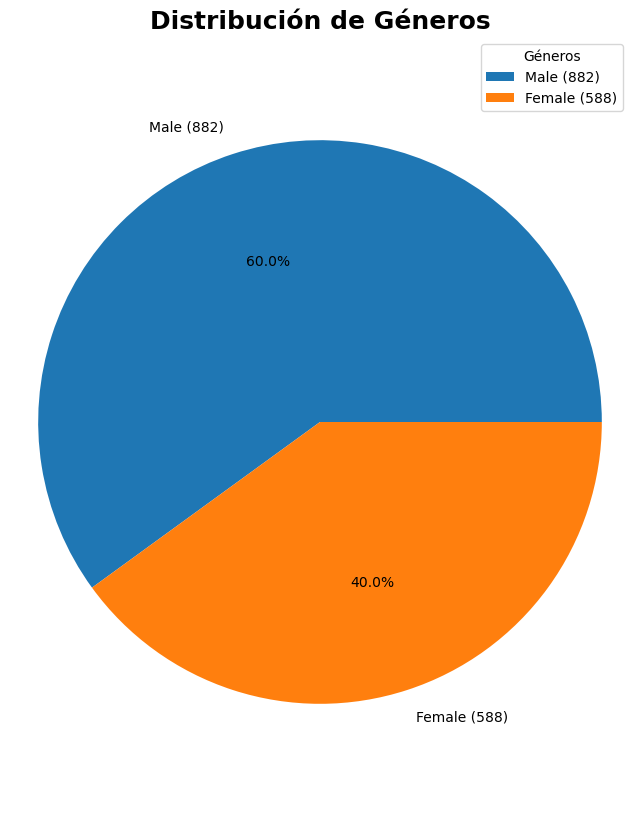

In [80]:
# Contamos los distintos valores de género y los guardamos en una variable
gender_counts = df_padb['Gender'].value_counts()
print(gender_counts)

# Porcentage y Total de nuestros valores para poder utilizarlos en los gráficos
total_count = gender_counts.sum()
gender_percentage = (gender_counts / total_count) * 100

# labels = gender_counts.index
# Mediante una función creamos las etiquetas de nuestro gráfico
labels = [f'{gender} ({count})' for gender, count in zip(gender_counts.index, gender_counts)]

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 10))

# Generamos el gráfico
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%')
plt.legend(title='Géneros')
ax.set_title('Distribución de Géneros', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.2 Distribución de edades

<p>Continuando con nuestro análisis, ahora vamos a examinar cómo está compuesta por edades nuestra empresa. Para ello, vamos a utilizar los valores de la <i>columna 'AgeRange'</i>. Podremos saber la composición de nuestra empresa de acuerdo con los rangos de edades. Este análisis es de utilidad para saber si tenemos varios empleados próximos a retiro.<p>

28 to 37        638
38 to 47        406
18 to 27        210
48 to 57        187
more than 58     29
Name: AgeRange, dtype: int64


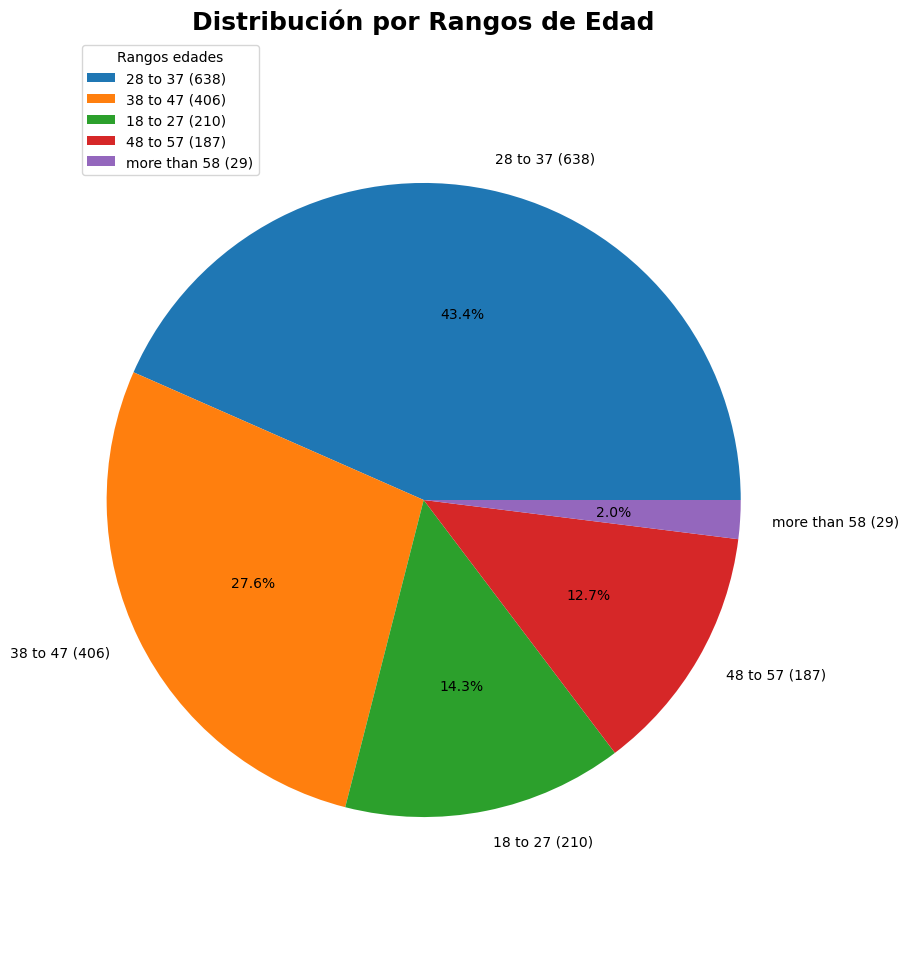

In [81]:
age_range_count = df_padb['AgeRange'].value_counts()
print(age_range_count)

total_age_count = age_range_count.sum()
age_percentage = (age_range_count / total_age_count) * 100

labels = [f'{age} ({count})' for age, count in zip(age_range_count.index, age_range_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(age_range_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Rangos edades', loc= 'upper left')
ax.set_title('Distribución por Rangos de Edad', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.3 Otras distribuciones

<p>¿Qué nivel educativo tienen nuestros empleados? El objetivo de entender la distribución a nivel educativo es brindar asistencia educativa y mejorar el rendimiento académico de nuestros empleados. Para cumplir con esta tarea, vamos a utilizar las columnas <i>"Education"</i> y <i>"EducationField"</i>.<p>

##### 4.1.b.3.a Distribución en Educación

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64


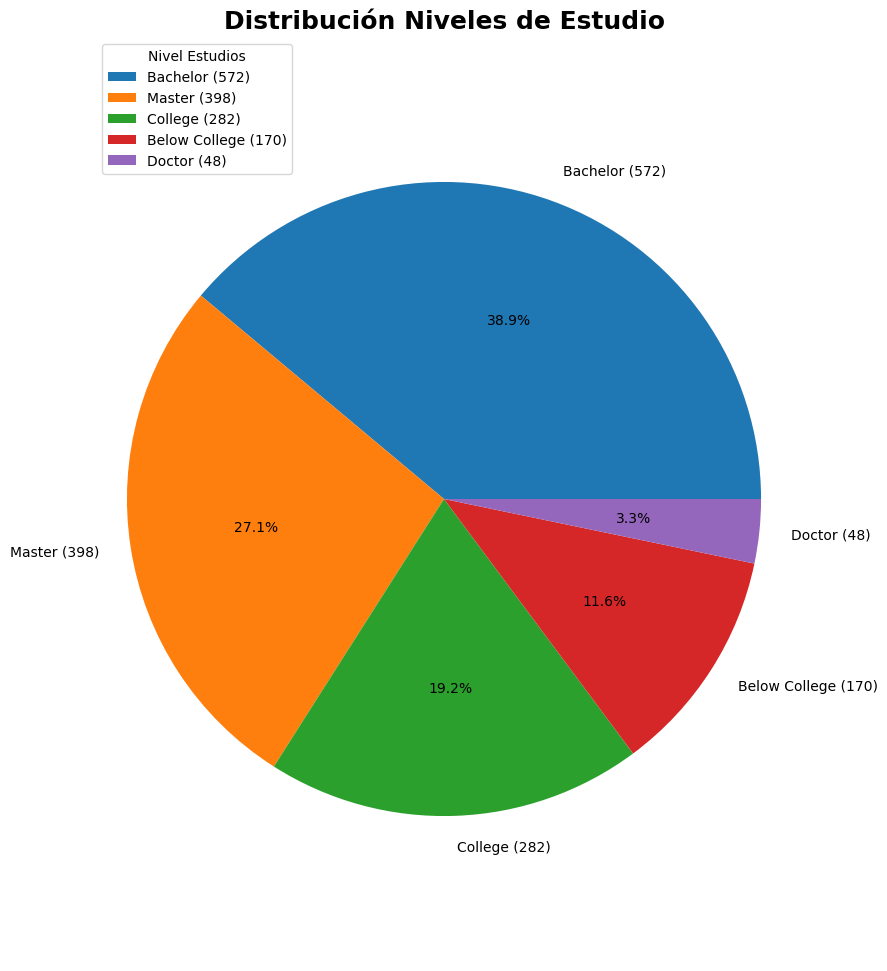

In [82]:
education_count = df_padb['Education'].value_counts()
print(education_count)

total_education_count = education_count.sum()
education_percentage = (education_count / total_education_count) * 100

labels = [f'{education} ({count})' for education, count in zip(education_count.index, education_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(education_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Nivel Estudios', loc= 'upper left')
ax.set_title('Distribución Niveles de Estudio', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.3.b Distribucion por campos de estudio

<p>El objetivo del análisis posterior es determinar cómo se distribuyen las personas según los distintos títulos educativos que poseen.</p>

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


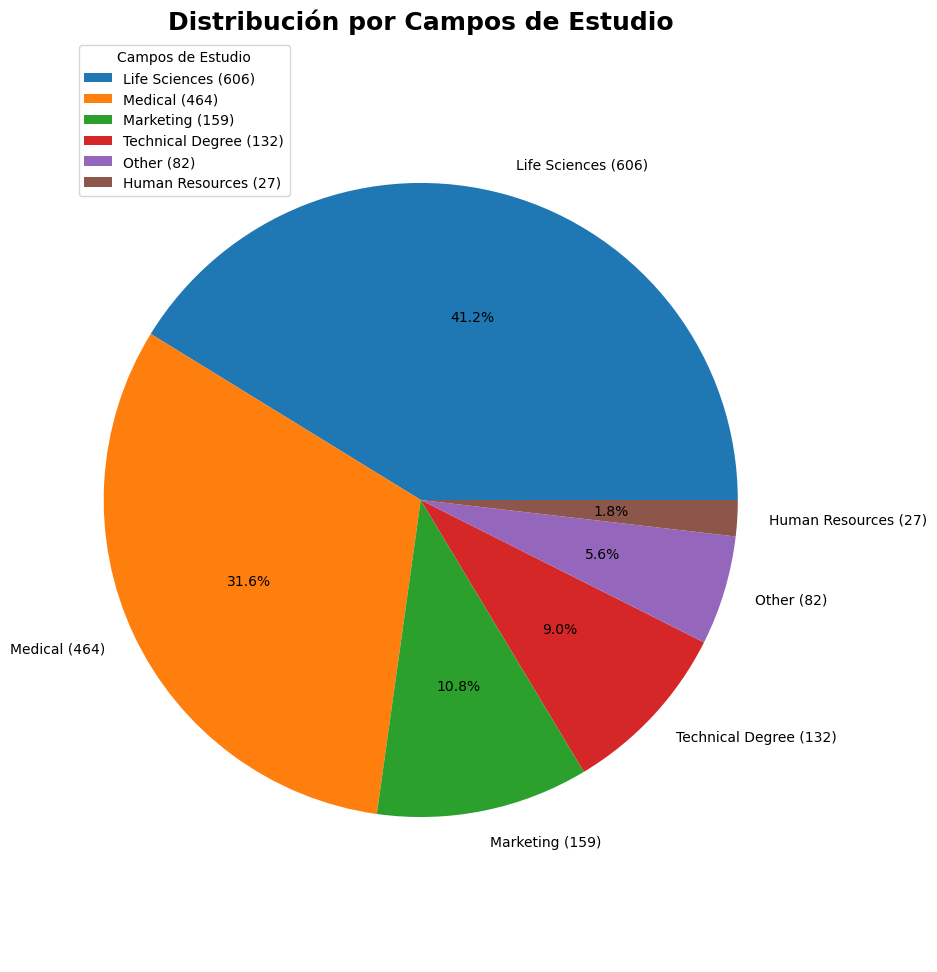

In [83]:
educationfield_count = df_padb['EducationField'].value_counts()
print(educationfield_count)

total_educationfield_count = educationfield_count.sum()
educationfield_percentage = (educationfield_count / total_educationfield_count) * 100

labels = [f'{education} ({count})' for education, count in zip(educationfield_count.index, educationfield_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(educationfield_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Campos de Estudio', loc= 'upper left')
ax.set_title('Distribución por Campos de Estudio', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.c Apéndice

<p>Agrego un par de cálculos en el siguiente apéndice para usarlos en futuros análisis. Recordemos que nuestro objetivo es <i>comparar y comprender cómo evoluciona la diversidad a lo largo del tiempo</i>.</p>

In [84]:
# Calculamos la edad promedio de los empleados
age_info = df_padb['Age'].describe()
print(age_info)

age_sum = df_padb['Age'].mean().round(0)
print("\nLa edad promedio es:")
print(age_sum)

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

La edad promedio es:
37.0


##### 4.2 Satisfacción Laboral

<p>Examinemos los niveles de satisfacción de los empleados en los diferentes roles de la empresa. ¿Cuál rol tiene el mayor o el menor grado de satisfacción? Con esta métrica, podemos identificar aquellos roles donde <u><i>satisfacción es <b>baja</b></i></u>, descubrir lo que está causando los niveles bajos, y diseñar o crear estrategias para mejorarlo.</p>

<p>Voy a empezar contando la distribución de las categorías de satisfacción.</p>

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64


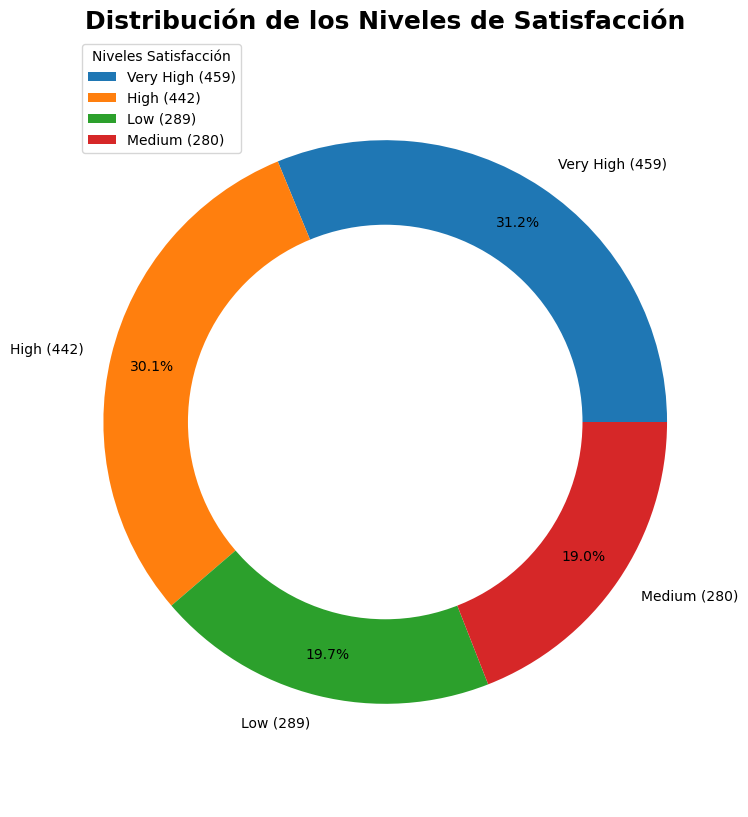

In [85]:
# Contando los valores de las difrentes categorias de satisfacción
job_satisfaction_count = df_padb['JobSatisfaction'].value_counts()
print(job_satisfaction_count)

# Sumatoria total
job_satisfaction_total = df_padb['JobSatisfaction'].sum()

# Creando las etiquetas para el gráfico
labels = [f'{jobsatisfaction} ({count})' for jobsatisfaction, count in zip(job_satisfaction_count.index, job_satisfaction_count)]

# Creando el gráfico
fig, ax = plt.subplots(figsize=(8, 10))

plt.pie(job_satisfaction_count, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
plt.legend(title='Niveles Satisfacción', loc= 'upper left')
ax.set_title('Distribución de los Niveles de Satisfacción', fontsize=18, fontweight='bold')
plt.axis('equal')
# Dibujamos un círculo
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Añadimos el círculo al gráfico
fig.gca().add_artist(centre_circle)
plt.show()

<p>Los datos muestran que <b><i>El 19,7%</i></b> de los empleados tienen <u>Baja</u> satisfacción con su trabajo. Identificaré cuáles de los roles no están tan satisfechos con su trabajo</p>

In [86]:
# Utilizando una tabla dinámica para identificar las respuestas de cada departamento
pivot = pd.pivot_table(df_padb[['Department', 'JobSatisfaction']], index='Department', columns='JobSatisfaction', aggfunc=len, fill_value=0)
print("Conteo Tabla Dinámica:")
print(pivot)

# Calculamos el porcentaje de satisfacción para cada departamento
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0).round(2) * 100

# Ordenames el orden de los valores
desired_order = ['Low', 'Medium', 'High', 'Very High']

# Aplicamos el nuevo orden
pivot_percentage_ordered = pivot_percentage.reindex(desired_order, axis=1)

print("\nPorcentajes Tabla Dinámica:")
print(pivot_percentage)

Conteo Tabla Dinámica:
JobSatisfaction         High  Low  Medium  Very High
Department                                          
Human Resources           15   11      20         17
Research & Development   300  192     174        295
Sales                    127   86      86        147

Porcentajes Tabla Dinámica:
JobSatisfaction         High   Low  Medium  Very High
Department                                           
Human Resources         24.0  17.0    32.0       27.0
Research & Development  31.0  20.0    18.0       31.0
Sales                   28.0  19.0    19.0       33.0


<p>Creemos un gráfico para visualizar nuestros datos.</p>

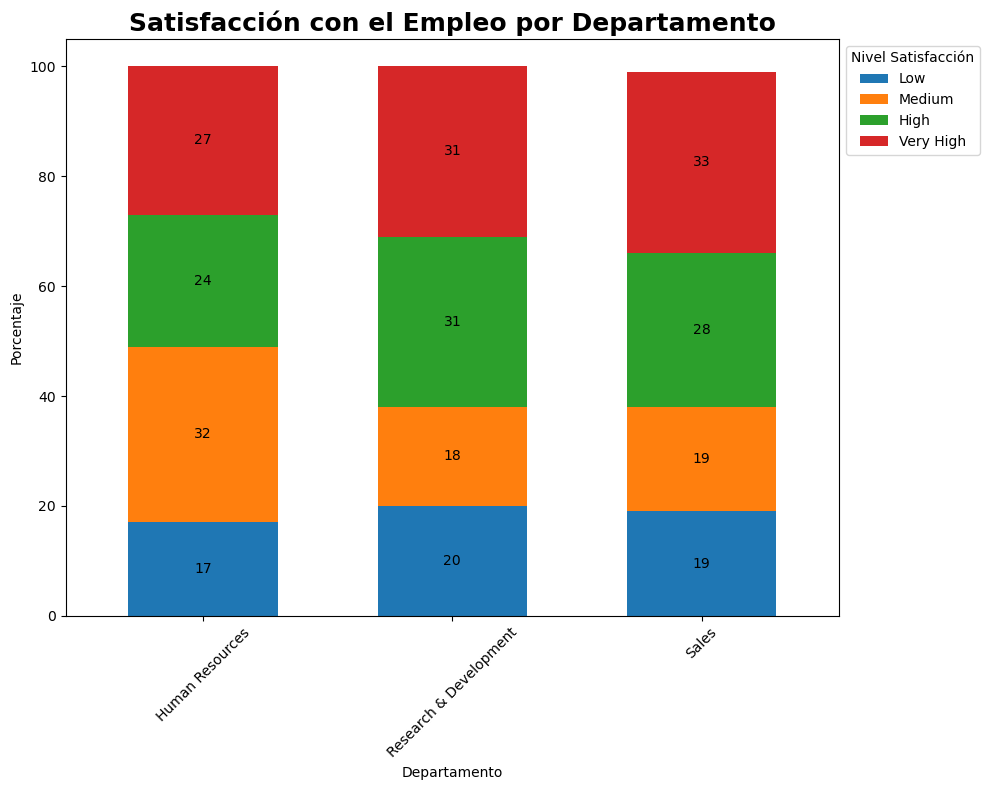

In [87]:
# Creamos el gráfico para visualizar los datos
ax = pivot_percentage_ordered.plot(kind='bar', stacked=True, figsize=(10, 8), width=0.6)

# Añadimos los valores a las barras
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.title('Satisfacción con el Empleo por Departamento', fontsize=18, fontweight='bold')
plt.xlabel('Departamento')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Nivel Satisfacción', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

<p>Anteriormente, mirando el porcentaje total entre los departamentos, encontramos que el 19,7% de todos los empleados tienen una baja motivación con su trabajo.</u></p>
<p>Para tener un informe más detallado, se procedió a desglosar por departamentos con el fin de conocer aún más la insatisfacción con el trabajo. Tenemos que tener en cuenta que de los <i>1470 empleados, 63 pertenecen al departamento de RRHH, 961 al Departamento de Investigación y Desarrollo y 446 a las Ventas</i>. Los porcentajes de insatisfacción entre los tres departamentos eran muy similares. <i>RRHH</i> presentó un <b>17%</b> de alrededor de 11 empleados, <i>R&D</i> un total de <b>20%</b> de cerca de 192 empleados y <i>Ventas</i> total de <b>19%</b> aproximadamente 86 empleados.</p>
<p>Podemos indicar que en el  <i>departamento I+D</i> tenemos el mayor número de empleados que están insatisfechos o poco motivados con su trabajo. Se recomienda investigar qué es lo que está causando esto y encontrar algunas soluciones.</p>
<p>Quisiera hacer una evaluación: <i>en RRHH hay 17% de los empleados con baja motivación y 32% con motivación media</i>. Se recomienda seguir adelante para ver si estos índices sufren aumentos, si así sucediera, tendríamos la mayoría de la mitad del departamento con una baja motivación con sus tareas. Mientras que los otros dos departamentos mostraron altas tasas de media y alta satisfacción con su trabajo.</p>

##### 4.2.a Apéndice

<p>A fin de continuar mi investigación, vamos a analizar cuántos empleados con valoración <b>"Muy Alto"</b> de satisfacción con su trabajo y qué proporción de ellos tienen motivación <b>"Baja"</b>. Identificaré a los empleados que muestren motivación <b>"Baja"</b> utilizando la columna <i>"JobInvolvement"</i>. Quienes tengan participación <b>"Alta"</b> y satisfacción <b>"Baja"</b> también serán examinados.</p>

In [88]:
# Creamos una mini base con las columnas a trabajar
job_db = df_padb[['JobInvolvement', 'JobSatisfaction']].copy()

# Filtrando los datos
jobFilteredData_VHL = job_db[(job_db['JobInvolvement'] == 'Very High') & (job_db['JobSatisfaction'] == 'Low')]
jobFilteredData_HL = job_db[(job_db['JobInvolvement'] == 'High') & (job_db['JobSatisfaction'] == 'Low')]

# Conteo de los datos filtrados.
countVH_Low = jobFilteredData_VHL.shape[0]        
countH_Low = jobFilteredData_HL.shape[0]        
print("El número total de empleados con Very High Job Involvement y Low Job Satisfaction es: ", countVH_Low)
print("El número total de empleados con High Job Involvement y Low Job Satisfaction es: ", countH_Low)

# Porcentaje que representan los datos
percentageVH_Low = countVH_Low / len(df_padb) * 100
percentageH_Low = countH_Low / len(df_padb) * 100
print('El porcentaje de empleados con Very High Job Involvement y Low Job Satisfaction es: ', round(percentageVH_Low, 2))
print('El porcentaje de empleados con High Job Involvement y Low Job Satisfaction es: ', round(percentageH_Low, 2))

El número total de empleados con Very High Job Involvement y Low Job Satisfaction es:  34
El número total de empleados con High Job Involvement y Low Job Satisfaction es:  166
El porcentaje de empleados con Very High Job Involvement y Low Job Satisfaction es:  2.31
El porcentaje de empleados con High Job Involvement y Low Job Satisfaction es:  11.29


##### 4.3 Desarrollo de Carrera

<p>¿Hay un crecimiento de carrera decente en la empresa? A través del análisis de datos, mi objetivo es determinar si la organización proporciona a sus empleados una oportunidad decente para el avance profesional.</p>
<p>¿Puede el desarrollo de carrera estar relacionado con la baja satisfacción laboral?. Utilizaré para el análisis los datos de la columna 'YearsAtCompany'.</p>

In [89]:
df_total_records = len(df_padb)
print(df_total_records)

1470


El número de empleados por departamento es:  
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


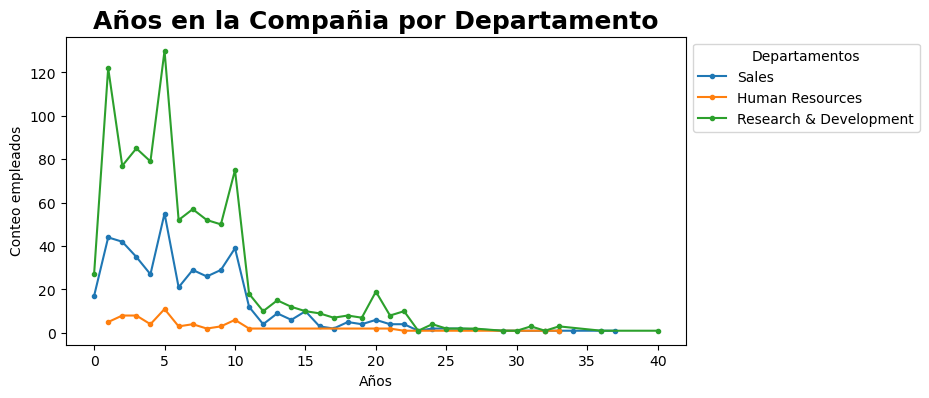

In [90]:
departments_count = df_padb['Department'].value_counts()
print('El número de empleados por departamento es: ', "\n", departments_count)
# Preparing the data
sales_count = df_padb[df_padb['Department'] == 'Sales'].groupby('YearsAtCompany').size()
rrhh_count = df_padb[df_padb['Department'] == 'Human Resources'].groupby('YearsAtCompany').size()
rd_count = df_padb[df_padb['Department'] == 'Research & Development'].groupby('YearsAtCompany').size()

# Creando un gráfico de línea
plt.figure(figsize=(8, 4))

# Graficando las líneas
plt.plot(sales_count.index, sales_count.values, label='Sales', marker='o', ms = 3)
plt.plot(rrhh_count.index, rrhh_count.values, label='Human Resources', marker='o', ms = 3)
plt.plot(rd_count.index, rd_count.values, label='Research & Development', marker='o', ms = 3)

# Añadiendo etiquetas al gráfico
plt.xlabel('Años')
plt.ylabel('Conteo empleados')
plt.title('Años en la Compañia por Departamento', fontsize=18, fontweight='bold')
plt.legend(title='Departamentos', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


<p>Examinemos cuántos años el empleado permanece en el mismo rol para los distintos departamentos.</p>

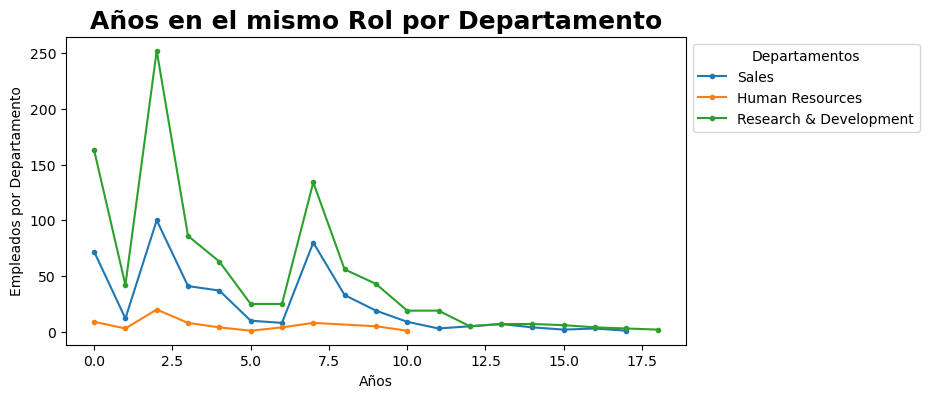

In [91]:
# Preparando los datos
sales_count_cr = df_padb[df_padb['Department'] == 'Sales'].groupby('YearsInCurrentRole').size()
rrhh_count_cr = df_padb[df_padb['Department'] == 'Human Resources'].groupby('YearsInCurrentRole').size()
rd_count_cr = df_padb[df_padb['Department'] == 'Research & Development'].groupby('YearsInCurrentRole').size()

# Creando el gráfico de líneas
plt.figure(figsize=(8, 4))

# Graficando las líneas
plt.plot(sales_count_cr.index, sales_count_cr.values, label='Sales', marker='o', ms = 3)
plt.plot(rrhh_count_cr.index, rrhh_count_cr.values, label='Human Resources', marker='o', ms = 3)
plt.plot(rd_count_cr.index, rd_count_cr.values, label='Research & Development', marker='o', ms = 3)

# Añadiendo etiquetas
plt.xlabel('Años')
plt.ylabel("Empleados por Departamento")
plt.title('Años en el mismo Rol por Departamento', fontsize=18, fontweight='bold')
plt.legend(title='Departamentos', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [92]:
average_years = df_padb['YearsAtCompany'].mean().round()
average_years_at_role = df_padb['YearsInCurrentRole'].mean().round()
average_years_promotion = df_padb['YearsSinceLastPromotion'].mean().round()
max_years_in_role = df_padb['YearsInCurrentRole'].max()

print(
    "Promedio de Años en la Compañia: ", average_years, "\n",
    "Promedio de Años en un mismo Puesto: ", average_years_at_role, "\n",
    "Promedio de Años desde la última promoción: ", average_years_promotion, "\n",
    "Máximo de Años en un mismo Puesto: ", max_years_in_role)
# print(max_years_in_role)

Promedio de Años en la Compañia:  7.0 
 Promedio de Años en un mismo Puesto:  4.0 
 Promedio de Años desde la última promoción:  2.0 
 Máximo de Años en un mismo Puesto:  18


<p>La mayoría de los empleados pasan <i>entre 0 y 10 años trabajando para la empresa</i>. Veremos que la permanencia en la empresa <u>decrece</u> significativamente después de los diez años. Así que traté de averiguar <i>cuánto tiempo en promedio permanecen los empleados en la empresa</i> y descubrí que alrededor de unos <u>7 años</u>, con <i>4 años en promedio trabajando en la misma posición</i>. Entonces decidí investigar el sistema de promoción de la empresa y descubrí que nuestra empresa tiene un promedio de dos años para conceder promociones.</p>
<p>Una <u>primera promoción</u> puede verse <i>alrededor de 2 años</i> después de unirse a la compañía, y luego una <u>segunda promoción</u> ocurre <i>5 años más tarde</i>. Entonces puede que un empleado cambie de empresa, o la persona continúe trabajando en la posición hasta su jubilación.</p>
<p>Con el fin de obtener más información, se examinó el número máximo de años en un solo rol. Se encontró que la duración <i>más larga en una posición es <b>18 años</b></i>.</p>


##### 4.4 ANALISIS del SUELDO

<p>Es hora de analizar <i>si existe una <u>disparidad significativa</u> entre los <b>salarios de los empleados</b> y los <b>logros educativos</b>.</i></p>

<p>Se utilizarán los valores de la columna <i>'MonthlyIncome'</i>, y los valores se distribuirán de acuerdo con los valores de la columna <i >'Education'</i>.</p>

In [93]:
# Para facilitar el trabajo creamos una tabla con las columnas 'MonthlyIncome' y 'Education'.
df_monthedu = df_padb[['MonthlyIncome', 'Education']].copy()
df_monthedu.head()

MonthlyIncome      Education
0           5993        College
1           5130  Below College
2           2090        College
3           2909         Master
4           3468  Below College

<p>Es hora de trabajar con nuestro nueva tabla de datos. Calculemos la mediana para cada categoría de educación.</p>

In [94]:
# Calculamos la mediana para la columna 'MonthlyIncome'.
monthlyIncome_median = df_monthedu['MonthlyIncome'].median()

# Second, let's calculate the median for each category of education
below_college_median = df_monthedu[df_monthedu['Education'] == 'Below College'].groupby('Education').median()
college_median = df_monthedu[df_monthedu['Education'] == 'College'].groupby('Education').median()
bachelor_median= df_monthedu[df_monthedu['Education'] == 'Bachelor'].groupby('Education').median()
master_median = df_monthedu[df_monthedu['Education'] == 'Master'].groupby('Education').median()
doctor_median = df_monthedu[df_monthedu['Education'] == 'Doctor'].groupby('Education').median()
print(
    "La mediana para Below College Education es: ", below_college_median.values, "\n",
    "La mediana para College Education es: ", college_median.values, "\n",
    "La mediana para Bachelor Education es: ", bachelor_median.values, "\n",
    "La mediana para Master Education es: ", master_median.values, "\n",
    "La mediana para Doctor Education es: ", doctor_median.values, "\n",
    'La mediana para la columna "MonthlyIncome" es: ', monthlyIncome_median )

La mediana para Below College Education es:  [[3849.]] 
 La mediana para College Education es:  [[4891.5]] 
 La mediana para Bachelor Education es:  [[4762.]] 
 La mediana para Master Education es:  [[5341.5]] 
 La mediana para Doctor Education es:  [[6203.]] 
 La mediana para la columna "MonthlyIncome" es:  4919.0


<p>Para visualizar nuestros datos, vamos a crear algunos gráficos. Utilizaré un gráfico <i><b>Barras</b></i> para comparar el ingreso mensual mediano para cada nivel de educación.</p>

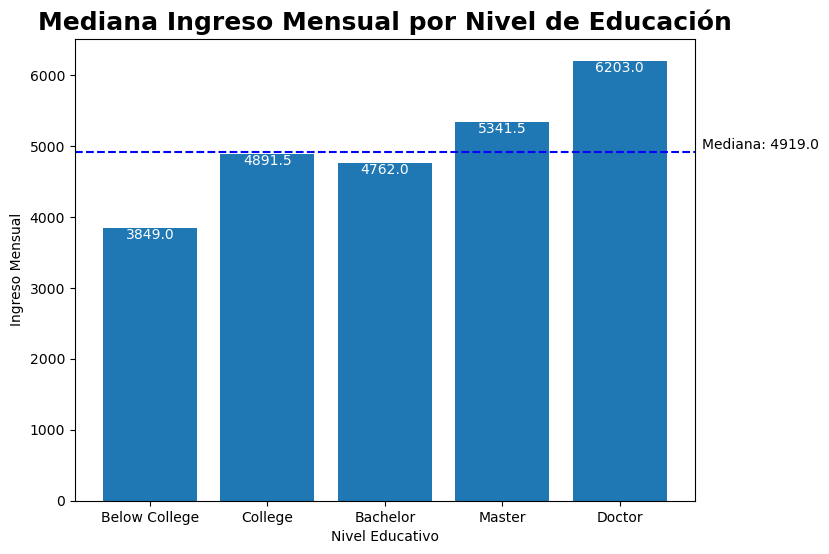

In [95]:
# Creamos un gráfico de barras
plt.figure(figsize = (8, 6))

# Añadiendo las variables
bar_data = [below_college_median['MonthlyIncome'].values[0],
            college_median['MonthlyIncome'].values[0],
            bachelor_median['MonthlyIncome'].values[0],
            master_median['MonthlyIncome'].values[0],
            doctor_median['MonthlyIncome'].values[0]]
education_cat = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Añadiendo etiquetas
for i, value in enumerate(bar_data):
    plt.text(i, value, str(value), ha='center', va='top', color='white')
    
# Agregamos la línea de promedio
plt.axhline(monthlyIncome_median, color='blue', linestyle='--', label='Media')

# Agregamos el valor de la línea promedio
plt.text(len(education_cat) + 0.7, monthlyIncome_median, f'Mediana: {monthlyIncome_median}', ha='right', va='bottom', color='black')

# Unificamos los datos y creamos el gráfico
plt.bar(education_cat, bar_data)
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingreso Mensual')
plt.title('Mediana Ingreso Mensual por Nivel de Educación', fontsize=18, fontweight='bold')
plt.show()

<p>Los empleados con <i>'Bachelor degree'</i> tienen menos ingresos que los que tienen un <i>'College degree'</i>, según los hallazgos cuando analizamos mediante la mediana. Pero tenemos que tener en cuenta hay más empleados con títulos de <i>'Bachelor'</i> que <i>'College'</i>, por lo tanto, investigaré si con el promedio, se presenta la misma anormalidad.<p>

In [96]:
# Calculamos el promedio para la columna 'MonthlyIncome'.
monthlyIncome_mean = df_monthedu['MonthlyIncome'].mean().round(2)

# Calculamos el promedio para cada categoría de Nivel Educativo
below_college_mean = df_monthedu[df_monthedu['Education'] == 'Below College'].groupby('Education').mean().round(2)
college_mean = df_monthedu[df_monthedu['Education'] == 'College'].groupby('Education').mean().round(2)
bachelor_mean= df_monthedu[df_monthedu['Education'] == 'Bachelor'].groupby('Education').mean().round(2)
master_mean = df_monthedu[df_monthedu['Education'] == 'Master'].groupby('Education').mean().round(2)
doctor_mean = df_monthedu[df_monthedu['Education'] == 'Doctor'].groupby('Education').mean().round(2)
print(
    "El promedio para Below College Education es: ", below_college_mean.values, "\n",
    "El promedio para College Education es: ", college_mean.values, "\n",
    "El promedio para Bachelor Education es: ", bachelor_mean.values, "\n",
    "El promedio para Master Education es: ", master_mean.values, "\n",
    "El promedio para Doctor Education es: ", doctor_mean.values, "\n",
    'El promedio para la columna "MonthlyIncome" es: ', monthlyIncome_mean )

El promedio para Below College Education es:  [[5640.57]] 
 El promedio para College Education es:  [[6226.65]] 
 El promedio para Bachelor Education es:  [[6517.26]] 
 El promedio para Master Education es:  [[6832.4]] 
 El promedio para Doctor Education es:  [[8277.65]] 
 El promedio para la columna "MonthlyIncome" es:  6502.93


<p>Se pudo determinar que los empleados con un título de <i>Bachelor</i> tienen más ingresos que los que tienen un título <i>'College'</i> al analizar la media. No es algo negativo para la empresa, pero es crucial notar que algunos empleados de con titulos <i>Bacherlor</i> <u>no están recibiendo lo suficiente</u>. La <u>media</u> para la titulación <i>Bachelor's degree</i> es de <b>6517,26</b> frente a los <b>6226,65</b> de la titulacion <i>College</i>.<p>

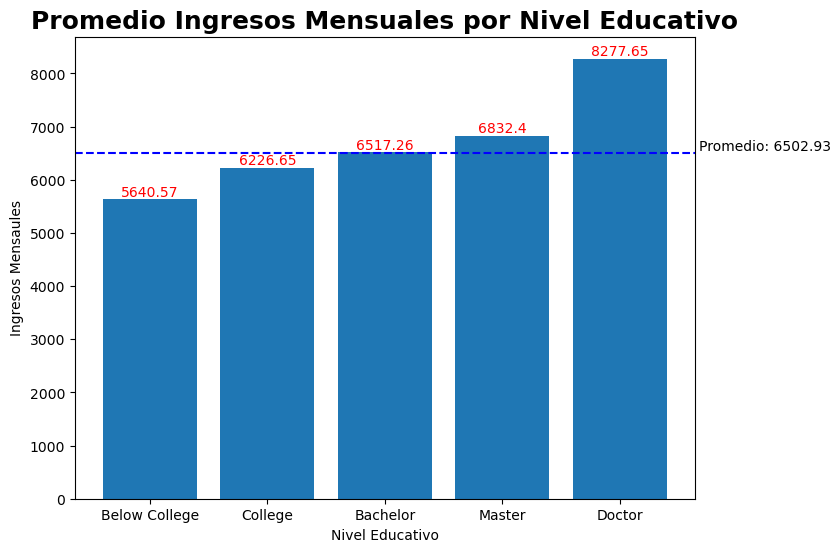

In [97]:
# Creamos un gráfico de barras
plt.figure(figsize = (8, 6))

# Añadiendo los valores
bar_mean_data = [below_college_mean['MonthlyIncome'].values[0],
            college_mean['MonthlyIncome'].values[0],
            bachelor_mean['MonthlyIncome'].values[0],
            master_mean['MonthlyIncome'].values[0],
            doctor_mean['MonthlyIncome'].values[0]]
education_cat = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Creando las etiquetas
for i, value in enumerate(bar_mean_data):
    plt.text(i, value, str(value), ha='center', va='bottom', color='red')
    
# Linea promedio
plt.axhline(monthlyIncome_mean, color='blue', linestyle='--', label='Media')

# Agregando el valor linea promedio
plt.text(len(education_cat) + 0.8, monthlyIncome_mean, f'Promedio: {monthlyIncome_mean}', ha='right', va='bottom', color='black')

# Unificando los datos en un gráfico
plt.bar(education_cat, bar_mean_data)
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingresos Mensaules')
plt.title('Promedio Ingresos Mensuales por Nivel Educativo', fontsize=18, fontweight='bold')
plt.show()

##### 4.4 FORMACIÓN Y DESARROLLO

<p>Continuando con nuestro análisis descriptivo, exploraré los años que la empresa se ha comprometido a brindar capacitación a sus empleados en cada departamento. Se intentará identificar áreas potenciales para mejorar la capacitación y cuáles departamentos podrían beneficiarse con ello.</p>

In [98]:
# Para facilitar el trabajo crearé una tabla con las columnas 'MonthlyIncome' y 'Education'.
df_timesTraining = df_padb[['Department', 'TrainingTimesLastYear']].copy()
df_timesTraining.head()

Department  TrainingTimesLastYear
0                   Sales                      0
1  Research & Development                      3
2  Research & Development                      3
3  Research & Development                      3
4  Research & Development                      3

In [99]:
timesTraining_average = df_timesTraining['TrainingTimesLastYear'].mean().round(2)

# Calculamos el promedio de horas dedicadas a Capacitación
sales_training_average = df_timesTraining[df_timesTraining['Department'] == 'Sales'].groupby('Department').mean().round(2)
rrhh_training_average = df_timesTraining[df_timesTraining['Department'] == 'Human Resources'].groupby('Department').mean().round(2)
rd_training_average= df_timesTraining[df_timesTraining['Department'] == 'Research & Development'].groupby('Department').mean().round(2)

print(
    "El promedio de horas dedicadas a capacitación en Sales es: ", sales_training_average.values, "\n",
    "El promedio de horas dedicadas a capacitación en Human Resources es: ", rrhh_training_average.values, "\n",
    "El promedio de horas dedicadas a capacitación en Research & Development es: ", rd_training_average.values, "\n",
    'TEl promedio de horas para la columna "TrainingTimeLastYear" es: ', timesTraining_average )

El promedio de horas dedicadas a capacitación en Sales es:  [[2.85]] 
 El promedio de horas dedicadas a capacitación en Human Resources es:  [[2.56]] 
 El promedio de horas dedicadas a capacitación en Research & Development es:  [[2.79]] 
 TEl promedio de horas para la columna "TrainingTimeLastYear" es:  2.8


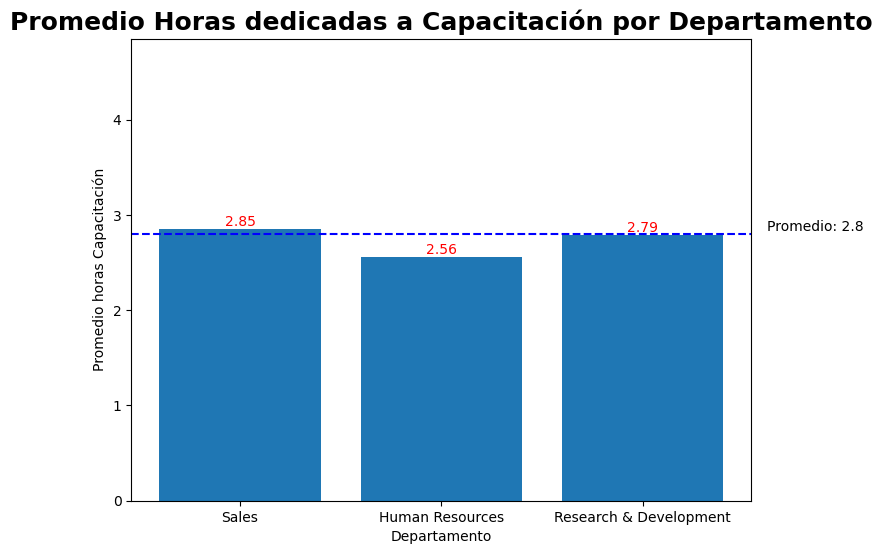

In [100]:
# Creamos un gráfico de barras
plt.figure(figsize = (8, 6))

# Añadimos los variables
bar_training_data = [sales_training_average['TrainingTimesLastYear'].values[0],
            rrhh_training_average['TrainingTimesLastYear'].values[0],
            rd_training_average['TrainingTimesLastYear'].values[0]
        ]
department_cat = ['Sales', 'Human Resources', 'Research & Development']

# Sumamos las etiquetas
for i, value in enumerate(bar_training_data):
    plt.text(i, value, str(value), ha='center', va='bottom', color='red')
    
# Creamos la línea promedio
plt.axhline(timesTraining_average, color='blue', linestyle='--', label='Average Training Times')

# Añadimos el valor promedio a la línea
plt.text(len(department_cat) + 0.1, timesTraining_average, f'Promedio: {timesTraining_average}', ha='right', va='bottom', color='black')

# Adjust y-axis limits to ensure the line is visible
plt.ylim(0, max(bar_training_data) + 2)

# Unificamos los datos y creamos el gráfico
plt.bar(department_cat, bar_training_data)
plt.xlabel('Departamento')
plt.ylabel('Promedio horas Capacitación')
plt.title('Promedio Horas dedicadas a Capacitación por Departamento', fontsize=18, fontweight='bold')
plt.show()

In [101]:
# Calculamos el promedio de Años dedicados a Cacitación por Departamento
sales_training_sum = df_timesTraining[df_timesTraining['Department'] == 'Sales'].groupby('Department').sum()
rrhh_training_sum = df_timesTraining[df_timesTraining['Department'] == 'Human Resources'].groupby('Department').sum()
rd_training_sum= df_timesTraining[df_timesTraining['Department'] == 'Research & Development'].groupby('Department').sum()

print(
    "El total de horas dedicadas a Capacitación en Sales es: ", sales_training_sum.values, "\n",
    "El total de horas dedicadas a Capacitación en Human Resources es: ", rrhh_training_sum.values, "\n",
    "El total de horas dedicadas a Capacitación en Research & Development es: ", rd_training_sum.values, "\n",
    'El total de años dedicados a capacitación "TrainingTimeLastYear" es: ', timesTraining_average )

El total de horas dedicadas a Capacitación en Sales es:  [[1270]] 
 El total de horas dedicadas a Capacitación en Human Resources es:  [[161]] 
 El total de horas dedicadas a Capacitación en Research & Development es:  [[2684]] 
 El total de años dedicados a capacitación "TrainingTimeLastYear" es:  2.8


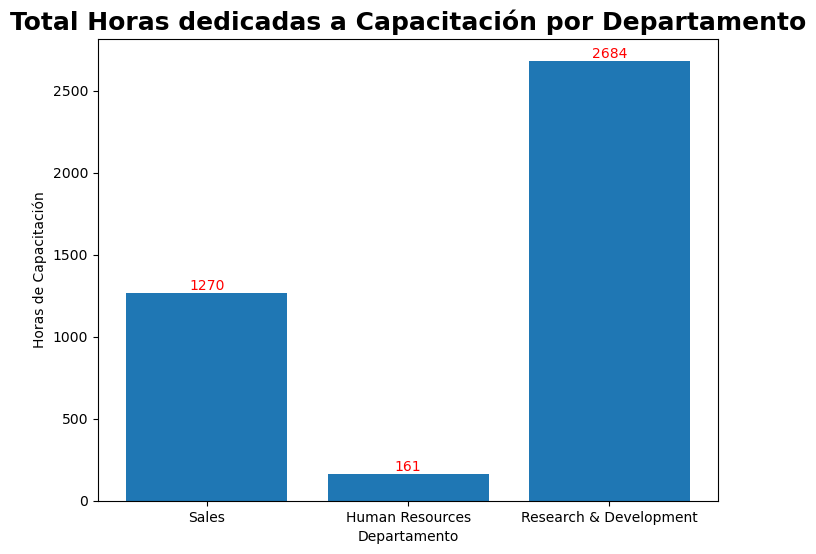

In [102]:
# Creamos un gráfico de barras
plt.figure(figsize = (8, 6))

# Adding the variables
bar_training_data = [sales_training_sum['TrainingTimesLastYear'].values[0],
            rrhh_training_sum['TrainingTimesLastYear'].values[0],
            rd_training_sum['TrainingTimesLastYear'].values[0]
        ]
department_cat = ['Sales', 'Human Resources', 'Research & Development']

# Añadimos las etiquetas
for i, value in enumerate(bar_training_data):
    plt.text(i, value, str(value), ha='center', va='bottom', color='red')

# Unificamos los valores para crear el gráfico
plt.bar(department_cat, bar_training_data)
plt.xlabel('Departamento')
plt.ylabel('Horas de Capacitación')
plt.title('Total Horas dedicadas a Capacitación por Departamento', fontsize=18, fontweight='bold')
plt.show()

##### 4.5   BALANCE ENTRE TRABAJO Y FAMILIA - ANÁLISIS DE HORAS EXTRAS

<p>Actualmente, la evaluación del <i><b>equilibrio entre trabajo y familia</b></i> de los trabajadores es una de las evaluaciones más cruciales. Investiguemos si están trabajando demasiado y si son capaces de compensar sus horas de trabajo con su tiempo libre. Recuerde que la mayoría de los <i>trabajadores valoran un equilibrio saludable entre trabajo y familia</i>, especialmente ante la creciente popularidad del empleo remoto</u>.<p>

In [103]:
df_wlb = df_padb[['OverTime', 'JobSatisfaction', 'WorkLifeBalance', 'DistanceFromHome']].copy()
df_wlb.head()

OverTime JobSatisfaction WorkLifeBalance  DistanceFromHome
0      Yes       Very High             Bad                 1
1       No          Medium          Better                 8
2      Yes            High          Better                 2
3      Yes            High          Better                 3
4       No          Medium          Better                 2

No     1054
Yes     416
Name: OverTime, dtype: int64


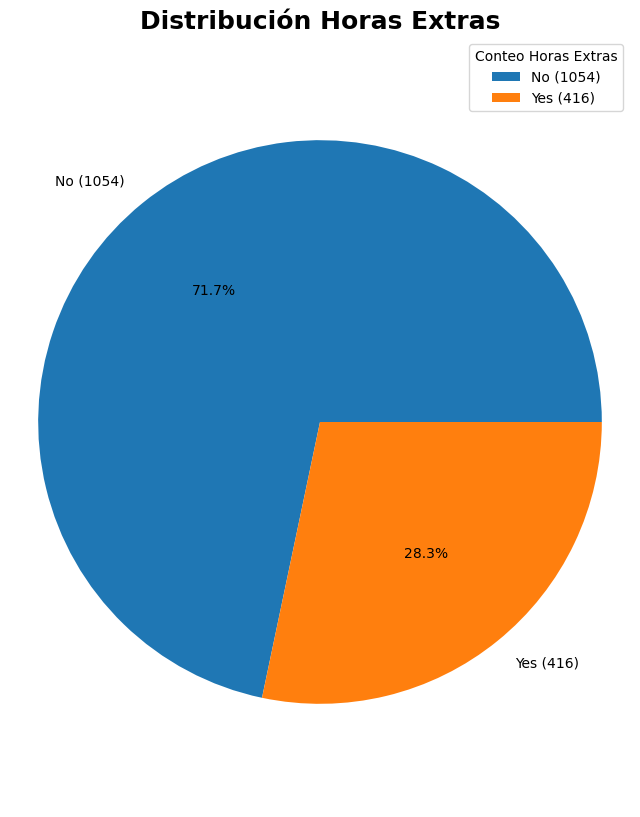

In [104]:
# Analizamos los datos de la columna OverTime
overtime_count = df_wlb['OverTime'].value_counts()
print(overtime_count)

# Las varables total y porcentaje para usar en los gráficos
total_overtime_count = overtime_count.sum()
overtime_percentage = (overtime_count / total_count) * 100

# Mediante una función creamos las etiquetas
labels = [f'{overtime} ({count})' for overtime, count in zip(overtime_count.index, overtime_count)]

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 10))

# Creamos el gráfico
plt.pie(overtime_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Conteo Horas Extras')
ax.set_title('Distribución Horas Extras', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

<p>Luego de examinar de los datos de la columna <i>'OverTime'</i> tenemos que sólo el <b>28,3%</b> de nuestros empleados trabajan horas extras. <u>no es posible</u> determinar cómo el equilibrio entre trabajo y familia de un empleado se vea afectado por las horas extras</u>. Para obtener un resultado más concluyente, vamos a examinar los valores de la columna <i>"WorkLifeBalance"</i>.<p>

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64


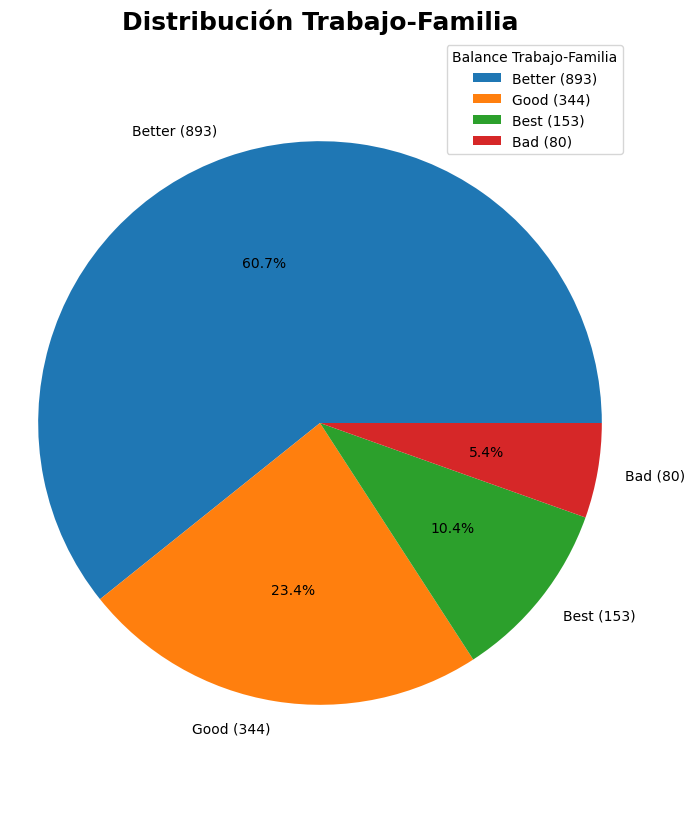

In [105]:
# Analizamos los datos de la columna WorkLifeBalance
wlbalance_count = df_wlb['WorkLifeBalance'].value_counts()
print(wlbalance_count)

# Las varables total y porcentaje para usar en los gráficos
total_wlbalance_count = wlbalance_count.sum()
wlbalance_percentage = (wlbalance_count / total_count) * 100

# Mediante una función creamos las etiquetas
labels = [f'{wlbalance} ({count})' for wlbalance, count in zip(wlbalance_count.index, wlbalance_count)]

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 10))

# Creamos el gráfico
plt.pie(wlbalance_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Balance Trabajo-Familia')
ax.set_title('Distribución Trabajo-Familia', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

<p>En la columna 'WorkLifeBalance' se pudo encontrar información más pertinente sobre la apreciación que tienen los empleados por el equilibrio entre trabajo y familia. Según mi investigación, <b>5,4%</b> de los trabajadores piensan que <u>no existe un buen equilibrio entre vida laboral y la familia</u>. Se intentará determinar si existe <u>otro factor</u> que afecte su decisión. Vamos a restringir los datos para ver sólo aquellos cuyas <i>"JobSatisfaction"</i> y <i>"WorkLifeBalance"</i> son ambos <b>"Bajo"</b>. También exploraré si aplica para las <i>'OverTime'</i>.<p>

In [106]:
# Filtramos los datos
wlb_JsWlb_low = df_wlb[(df_wlb['WorkLifeBalance'] == 'Bad') & (df_wlb['JobSatisfaction'] == 'Low') & (df_wlb['OverTime'] == 'Yes')]
wlb_JsWlb_good = df_wlb[(df_wlb['WorkLifeBalance'] == 'Good') & (df_wlb['JobSatisfaction'] == 'Low') & (df_wlb['OverTime'] == 'Yes')]

# Conteo de los datos filtrados
countWlbJs_low = wlb_JsWlb_low.shape[0]        
countWlbJs_good = wlb_JsWlb_good.shape[0]        
print("El número total de empleados con Low Job Satisfaction, Bad Work-Life Balance y Over time Yes, es: ", countWlbJs_low)
print("El número total de empleados con Good Job Satisfaction, Bad Work-Life Balance y Over time Yes es: ", countWlbJs_good)

El número total de empleados con Low Job Satisfaction, Bad Work-Life Balance y Over time Yes, es:  2
El número total de empleados con Good Job Satisfaction, Bad Work-Life Balance y Over time Yes es:  17


In [107]:
df_wlb['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

<p>Después de analizar los datos, se descubrió que los empleados están satisfechos con el equilibrio trabajo-familia que proporciona la organización. <i>Es crucial enfatizar e intentar aplicar una política para reducir el <b>28,3%</b> de los trabajadores que realizan horas extras. Además, descubrí que muy pocos trabajadores realmente tienen problemas para encontrar un equilibrio entre trabajo y familia, por lo que se aconseja asistir a los empleados con mayores dificultades.<p>

##### 4.6 ANÁLISIS DE RENUNCIAS

<p>Es hora de trabajar con una de las métricas más importantes para nuestra empresa: <i><b>la tasa de renuncias de la empresa durante 2021</b></i>. Conocer <i><u>la tasa de renuncias</u></i> en nuestra organización nos ayudará a saber si los empleados que abandonan la empresa son aquellos que rinden bien o aquellos que rinden poco laboralmente. Tal vez una alta tasa de renuncias signifique que estamos perdiendo empleados de bajos resultados; esta métrica nos ayudará a mantener buenos talentos, además de conocer un poco las causas por las cuales se producen las renuncias en nuestra empresa.</p>

In [108]:
# Creamos una tabla con las columnas a utilizar en el análisis
df_attrition = df_padb[['Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'Gender', 'AgeRange', 'Education']]
df_attrition.head()

Attrition EnvironmentSatisfaction JobInvolvement JobSatisfaction  \
0       Yes                  Medium           High       Very High   
1        No                    High         Medium          Medium   
2       Yes               Very High         Medium            High   
3        No               Very High           High            High   
4        No                     Low           High          Medium   

   MonthlyIncome OverTime  Gender  AgeRange      Education  
0           5993      Yes  Female  38 to 47        College  
1           5130       No    Male  48 to 57  Below College  
2           2090      Yes    Male  28 to 37        College  
3           2909      Yes  Female  28 to 37         Master  
4           3468       No    Male  18 to 27  Below College

<p>Con la nueva tabla, ahora podemos calcular la tasa de renuncias de nuestra empresa.</p>

El conteo de renuncias es:  
 No     1233
Yes     237
Name: Attrition, dtype: int64
El porcentaje de renuncias es:  
 No     83.9
Yes    16.1
Name: Attrition, dtype: float64


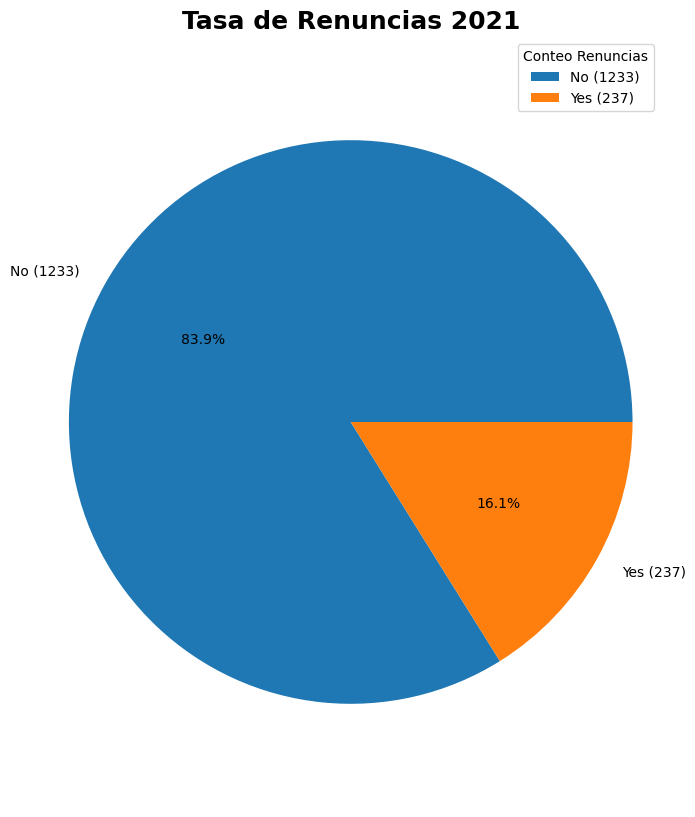

In [109]:
# Analizamos los datos de la columna Attrition
attrition_count = df_attrition['Attrition'].value_counts()
print('El conteo de renuncias es: ', '\n', attrition_count)

# Las varables total y porcentaje para usar en los gráficos
total_attrition_count = attrition_count.sum()
attrition_percentage = (attrition_count / total_count) * 100
print('El porcentaje de renuncias es: ', '\n', round(attrition_percentage, 1))

# Mediante una función creamos las etiquetas
labels = [f'{attrition} ({count})' for attrition, count in zip(attrition_count.index, attrition_count)]

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 10))

# Creando el gráfico
plt.pie(attrition_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Conteo Renuncias')
ax.set_title('Tasa de Renuncias 2021', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

<p>El análisis nos muestra una tasa de renuncias de un <b>16,1% en 2021</b>, <i><u>por lo tanto, 237 empleados en total abandonaron</u></i> la organización. Intentaré averiguar si fueron impulsados por alguna razón particular o si la renuncia es producto de un cambio que ellos mismos deseaban.<p>

In [110]:
# Filtrando los datos
attrition_worstvalues = df_attrition[(df_attrition['EnvironmentSatisfaction'] == 'Low') & (df_attrition['JobSatisfaction'] == 'Low') & (df_attrition['OverTime'] == 'Yes')]
attrition_mediumvalues = df_attrition[(df_attrition['EnvironmentSatisfaction'] == 'Medium') & (df_attrition['JobSatisfaction'] == 'Low') & (df_attrition['OverTime'] == 'Yes')]

# Contando los datos filtrados
count_attrition_wv = attrition_worstvalues.shape[0]        
count_attrition_mv = attrition_mediumvalues.shape[0]        
print("El número de empleados que renunciaron con Job Satisfaction y Environment Satisfaction 'Low', y working Over time es: ", count_attrition_wv)
print("El número de empleados que renunciaron con Job Satisfaction 'Low' y Environment Satisfaction 'Medium', y working Over time es: ", count_attrition_mv)

El número de empleados que renunciaron con Job Satisfaction y Environment Satisfaction 'Low', y working Over time es:  15
El número de empleados que renunciaron con Job Satisfaction 'Low' y Environment Satisfaction 'Medium', y working Over time es:  16


<p>Vamos a averiguar si <u>la elección del empleado de dejar la empresa</u> fue influenciada por su <i><b>ingreso mensual</b></i>.</p>

In [111]:
# Calculando el promedio de Ingresos mensuales
attrition_mincome_mean = df_attrition['MonthlyIncome'].mean().round(2)
print(attrition_mincome_mean)

# Filtrando los datos entre aquellos que se encuantran por debajo o arriba del promedio de ingresos mensuales
attrition_over_mean_mi = df_attrition[(df_attrition['MonthlyIncome'] > attrition_mincome_mean) & (df_attrition['Attrition'] == 'Yes')]
attrition_under_mean_mi = df_attrition[(df_attrition['MonthlyIncome'] < attrition_mincome_mean) & (df_attrition['Attrition'] == 'Yes')]

count_attrition_over_mean = attrition_over_mean_mi.shape[0]        
count_attrition_under_mean = attrition_under_mean_mi.shape[0]      

print('El número de empleados que renunciaron y estaban por arriba del promedio, es: ', count_attrition_over_mean)
print('El número de empleados que renunciaron y estaban por debajo del promedio, es: ', count_attrition_under_mean)

6502.93
El número de empleados que renunciaron y estaban por arriba del promedio, es:  52
El número de empleados que renunciaron y estaban por debajo del promedio, es:  185


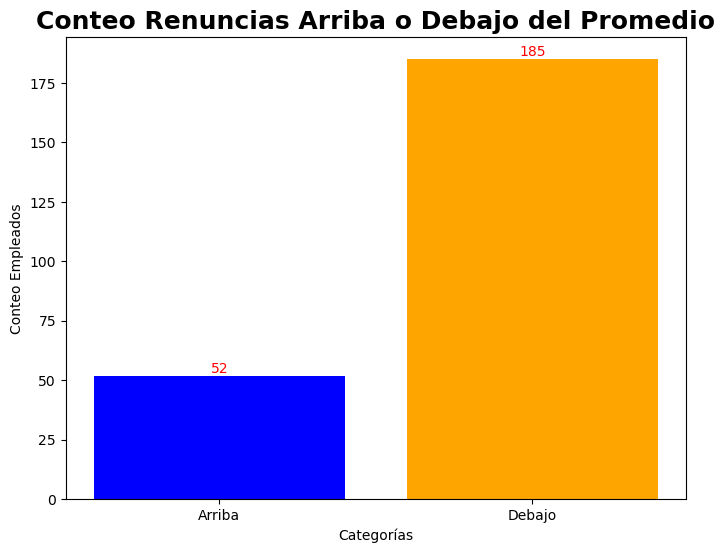

In [112]:
# Creamos un gráfico de barras
plt.figure(figsize = (8, 6))

# Añadimos las variables
attrition_data = [count_attrition_over_mean, count_attrition_under_mean]
attrition_cat = ['Arriba', 'Debajo']

# Creamos las etiquetas
for i, value in enumerate(attrition_data):
    plt.text(i, value, str(value), ha='center', va='bottom', color='red')

# Unificamos los datos en el gráfico
plt.bar(attrition_cat, attrition_data, color=['blue', 'orange'])
plt.xlabel('Categorías')
plt.ylabel('Conteo Empleados')
plt.title('Conteo Renuncias Arriba o Debajo del Promedio', fontsize=18, fontweight='bold')
plt.show()

<p>Luego del análisis se concluye que 52 de los 237 empleados que salieron de la empresa tenían ingresos mensuales que estaban por encima de la media, mientras que 185 de los trabajadores que renunciaron, sus ingresos eran inferiores a la media.<p>
<p>Examinemos la distribución <u>de las renuncias</u> por <i><b>Género</b></i> y <i><b>Distribución de la edad</b></i>.<p>

In [113]:
# Analizamos las renuncias de acuerdo al género
attrition_female = df_attrition[(df_attrition['Gender'] == 'Female') & (df_attrition['Attrition'] == 'Yes')]
attrition_male = df_attrition[(df_attrition['Gender'] == 'Male') & (df_attrition['Attrition'] == 'Yes')]

# Contamos la distribución de las renuncias por género
count_attrition_female = attrition_female.shape[0]
count_attrition_male = attrition_male.shape[0]

print('Número de mujeres que renunciaron a la empresa: ', count_attrition_female)
print('Número de hombres que renunciaron a la empresa: ', count_attrition_male)

Número de mujeres que renunciaron a la empresa:  87
Número de hombres que renunciaron a la empresa:  150


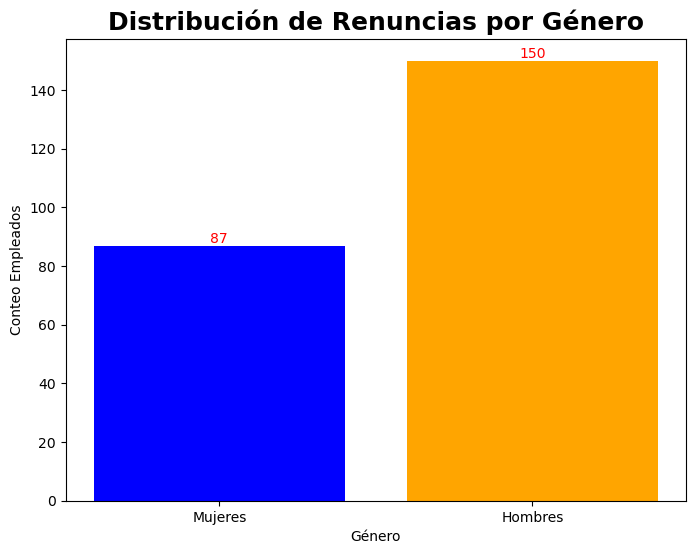

In [114]:
# Creamos un gráfico de barras
plt.figure(figsize = (8, 6))

# Añadimos las variables
gender_attrition_data = [count_attrition_female, count_attrition_male]
attrition_gender_cat = ['Mujeres', 'Hombres']

# Creamos las etiquetas
for i, value in enumerate(gender_attrition_data):
    plt.text(i, value, str(value), ha='center', va='bottom', color='red')

# Unificamos los datos en el gráfico
plt.bar(attrition_gender_cat, gender_attrition_data, color=['blue', 'orange'])
plt.xlabel('Género')
plt.ylabel('Conteo Empleados')
plt.title('Distribución de Renuncias por Género', fontsize=18, fontweight='bold')
plt.show()

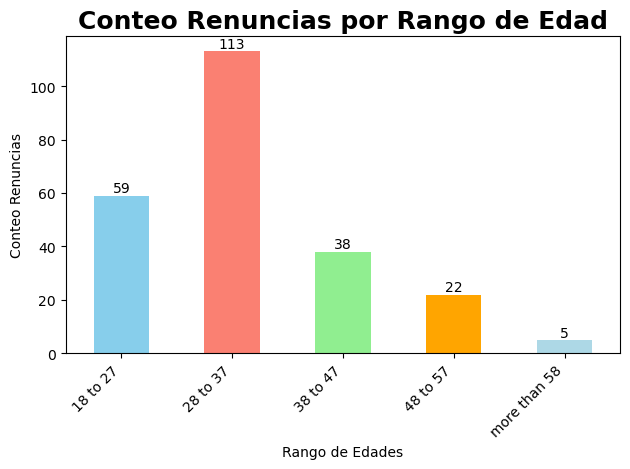

In [115]:
# Filtramos los datos por el valor 'Yes' en las renuncias
age_range_attrition_filter = df_attrition[(df_attrition['Attrition'] == 'Yes')]

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue']

# Agrupamos los valores por la columna 'AgeRange'
attrition_by_age = age_range_attrition_filter.groupby('AgeRange').size()

# Creamos un gráfico de barras
ax = attrition_by_age.plot(kind='bar', color=colors)

# Organizamos las etiquetas
ax.set_xticks(range(len(attrition_by_age)))
ax.set_xticklabels(attrition_by_age.index, rotation=45, ha='right')

# Añadimos los valores a las barras
for i, v in enumerate(attrition_by_age):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Título y etiquetas
plt.xlabel('Rango de Edades')
plt.ylabel('Conteo Renuncias')
plt.title('Conteo Renuncias por Rango de Edad', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


<p>Cuando desglosamos las renuncias por <i>rango de edad</i>, vemos que en el rango de edades de<i>18 a 47 años</i> es donde la empresa <u> pierde el mayor número de empleados</u>, con un totla de <b>210 retiros</b>. El rango de edad de 28 a 37 años es donde la empresa <i><u>registra el mayor número de renuncias</u></i>.<p>
<p>Por lo analizado con el rango de edad, vamos a investigar para conocer si, a partir de esas dimisiones, la empresa está <b><i>perdiendo talento</i></b>. Analizaré las renuncias utilizando el nivel de educación del los empleados.</p>

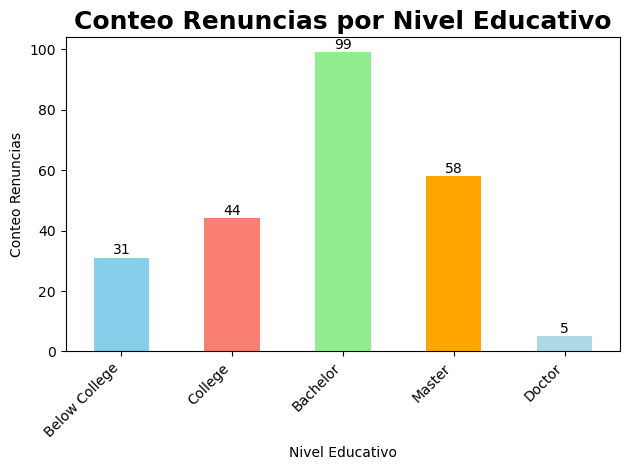

In [116]:
# Filtramos los datos por el valor 'Yes' en las renuncias
education_attrition_filter = df_attrition[(df_attrition['Attrition'] == 'Yes')]

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue']

# Agrupamos los valores por la columna 'AgeRange'
attrition_by_education = education_attrition_filter.groupby('Education').size()

# Definimos el orden de los valores de Educación
desired_order = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Ordenamos el orden de los valores
attrition_by_education = attrition_by_education.reindex(desired_order)

# Creamos el gráfico
ax = attrition_by_education.plot(kind='bar', color=colors)

# Organizamos las etiquetas
ax.set_xticks(range(len(attrition_by_age)))
ax.set_xticklabels(attrition_by_education.index, rotation=45, ha='right')

# Añadimos los valores a las barras
for i, v in enumerate(attrition_by_education):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Título y etiquetas
plt.xlabel('Nivel Educativo')
plt.ylabel('Conteo Renuncias')
plt.title('Conteo Renuncias por Nivel Educativo', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

<p>Al desglosar las renuncias <u>por nivel de educación</u>, pude encuentrar que los empleados con títulos de <i>"Bachelor"</i> y <i>"Master"</i>, seguidos por <i>"College"</I>, son los empleados más propensos a renunciar, registrando un <i>total de <b>201</b> renuncias</i >. Esta información plantea la posibilidad de que <i>la organización está <u>perdiendo talento</u> como resultado de las dimisiones</i>.<p>

##### 4.7 MODELOS CON MACHINE LEARNING

<p>Intentaré crear algunos <i>Modelos de Machine Learning</i> usando los datos de la empresa.<p>
<p>Para este tipo de análisis, necesitamos usar <i><b>Numpy</b></i>.</p>

##### 4.7.a Correlación entre Salario y Experiencia - Regresión Lineal

<p>Usaré los datos de las columnas <i>"MonthlyIncome"</i> y <i>"TotalWorkingYears"</i> para este estudio. El <b>Modelo de Regresión Lineal</b> será la herramienta a utilizar. <u><i>El propósito es saber si la remuneración de los empleados es proporcional a sus años de experiencia</i></u>.<p>
<p>Utilizaré dos tipos de cálculos, uno usando Numpy y el otro de StatsModels, que incluyen información como coeficientes, errores estándar, valores t, valores p y R-squared, que son cruciales para interpretar los resultados del modelo de regresión lineal. Para visualizar los datos, usaré un plano de dispersión, o scatter-plot</p>

In [117]:
# Creamos la base a trabajar
df_salary = df_padb[['MonthlyIncome', 'TotalWorkingYears']].copy()
df_salary.describe()

MonthlyIncome  TotalWorkingYears
count    1470.000000        1470.000000
mean     6502.931293          11.279592
std      4707.956783           7.780782
min      1009.000000           0.000000
25%      2911.000000           6.000000
50%      4919.000000          10.000000
75%      8379.000000          15.000000
max     19999.000000          40.000000

##### 4.7.a.1 Regresión Lineal - Numpy

[[1.         0.77289325]
 [0.77289325 1.        ]]


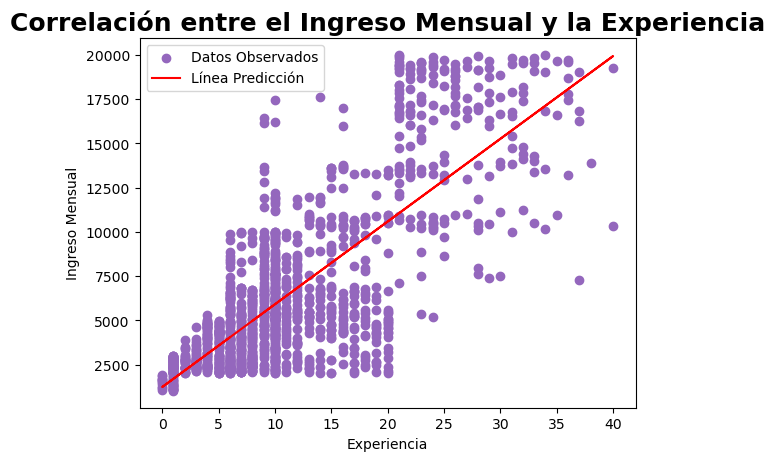

In [118]:
# Definimos la ubicación de los datos en los axis
x = df_salary['TotalWorkingYears'];
y = df_salary['MonthlyIncome'];

# Creamos el gráfico
plt.scatter(x = x, y = y, color='#9467bd')

# Obtenemos el m (slope) y b(intercept) de nuestra línea de regresión
m, b = np.polyfit(x, y, 1)
lreg = np.corrcoef(x, y)
# Graficamos la línea de regresión
plt.plot(x, m*x+b, color='red')

# Adding labels and title
plt.xlabel('Experiencia')
plt.ylabel('Ingreso Mensual')
plt.legend(['Datos Observados', 'Línea Predicción'])
plt.title('Correlación entre el Ingreso Mensual y la Experiencia', fontsize=18, fontweight='bold')

# Imprimimos el valor de la línea de regresión
print(lreg)

<p>Nuestro <i>coeficiente de correlación</i> es aproximadamente <b>0.77</b> indica una relación lineal positiva, relativamente <u> fuerte</u> entre los datos de las columnas <i>TotalWorkingYears</i> y <i>MonthlyIncome</i>.</p>
<p>Algunos salarios deben modificarse para acercarlos de la línea de regresión así la empresa podrá experimentar una mejor correlación entre sueldo y experiencia. De tal manera, la empresa tendrá opciones de sueldo más atractivas.</p>
<p>Es importante indicar que no estamos incorporando a nuestro análisis cualquier otro incentivo financiero que la empresa otorga a sus empleados.</p>

##### 4.7.a.2 Regresión Lineal - Statsmodels
<p>Voy a importar la biblioteca de statmodels para trabajar con la otra fórmula de Regresión Lineal.</p>

In [119]:
import statsmodels.formula.api as smf
model = smf.ols('MonthlyIncome ~ TotalWorkingYears', data = df_salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          2.73e-292
Time:                        00:16:11   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1227.9353    137.299      8.944      0.000     958.612    1497.259
TotalWorkingYears   467.6584     10.021     46.669      0.000     448.002     487.315
==============================================================================
Omnibus:                       47.473   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.304
Skew:                           0.269   Prob(JB):                     6.02e-18
Kurtosis:                       4.003   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>Ahora hemos creado el modelo que está realizando un <i><u>análisis de regresión lineal</u></i> para explorar la relación entre la variable del predictor <i>TotalWorkingYears y el MonthlyIncome</i >.</p>
<p>Utilizemos el modelo para crear algunas predicciones.</p>

In [120]:
# Utilizamos otro modelo para crear predicciones
# Intentamos predecir los salarios para cada año de experiencia y lo guardamos en una variable
pred1 = model.predict(pd.DataFrame(df_salary['TotalWorkingYears']))
print(pred1)

0       4969.202583
1       5904.519406
2       4501.544171
3       4969.202583
4       4033.885759
           ...     
1465    9178.128289
1466    5436.860994
1467    4033.885759
1468    9178.128289
1469    4033.885759
Length: 1470, dtype: float64


<p>Con el modelo de regresión lineal (model), predicimos los salarios basados en los años de experiencia. Los valores se almacenan ahora en una variable llamada <b><i>pred1</i></b>.</p>
<p>Examinemos la apariencia del modelo en una trama de dispersión (scatter-plot).</p>

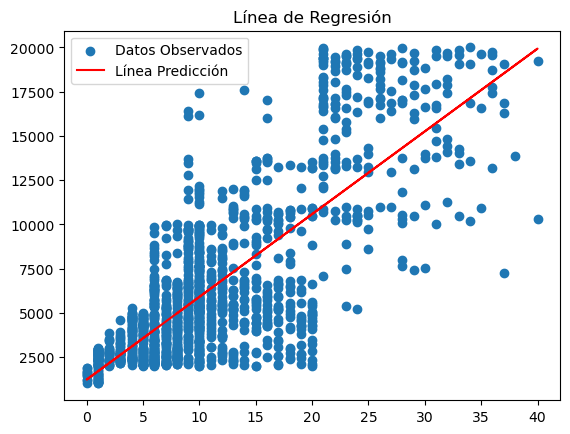

In [121]:
# Línea de Regresión
# Utilizamos los valores de X e Y, los visualizamos mediante un scatter-plot
plt.scatter(x, y)
plt.plot(x, pred1, 'r')
# Let's add a legend to our plot
plt.legend(['Datos Observados', 'Línea Predicción'])
plt.title('Línea de Regresión')
plt.show()

<p>El resultado del modelo de predicción es idéntico al producido con Numpy.</p>
<p>Examinemos <i><u>el cálculo de errores</u></i>.</p>

In [122]:
# Error de Cálculo
res1 = y - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
print(rmse1)

2986.3521316844103


<p>Como medida de la capacidad de predicción del modelo de regresión lineal, calculé el error cuadrado medio de raíz (RMSE). El modelo calcula los residuos, los cuadra para obtener el error cuadrado promedio (MSE), y luego toma la raíz cuadrada para obtener la RMSE. Un número RMSE más bajo indica un mayor rendimiento, y da información sobre cuán bien el modelo coincide con los datos observados. Con un valor de <b>2986.35</b>, esta es la magnitud media de los errores entre los valores predecibles y los valores reales. El modelo está dando buenos resultados en términos de predicción. <p>

##### 4.7.a.3 Regresión lineal - Transformación Logarítmica (Log)
<p>Convertimos nuestros datos usando logaritmos.</p>

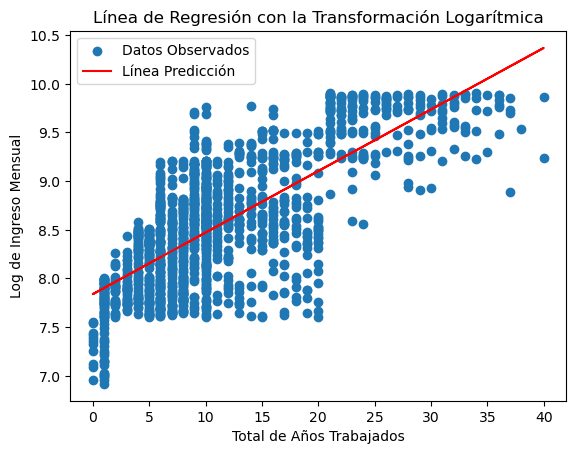

In [123]:
# Datos Transformados
# Transformación Logarítmica
plt.scatter(x = x, y = np.log(y))
np.corrcoef(x, np.log(y))
model2 = smf.ols('np.log(MonthlyIncome) ~ TotalWorkingYears', data=df_salary).fit()
# Añadimos la línea de regresión
plt.plot(x, model2.predict(df_salary), color='red')

# Título y etiquetas
plt.xlabel('Total de Años Trabajados')
plt.ylabel('Log de Ingreso Mensual')
plt.legend(['Datos Observados', 'Línea Predicción'])
plt.title('Línea de Regresión con la Transformación Logarítmica')

plt.show()

<p>Después de dar a Salario una transformación logarítmica, podemos ver cómo <i>'Experiencia'</i> y <i>'Salario'</i> se relacionan entre sí. El coeficiente de correlación entre las dos variables está ahora disponible, y se proporciona un modelo de regresión lineal para examinar aún más la conexión entre Experiencia y el logaritmo salarial.<p>
<p>Se recomienda comparar los datos originales para ver si la relación está mejor representada en una escala logarítmica. Podemos interpretar los coeficientes del modelo de regresión lineal para comprender la relación entre <i>'TotalWorkingYears'</i> y el valor esperado de <i>'MonthlyIncome'</i> en la escala logarítmica.</p>

##### 4.7.a.4 Regresión lineal - Comparación
<p>Usando un análisis residual, voy a contrastar los datos transformados por logaritmo con los datos originales.<p>

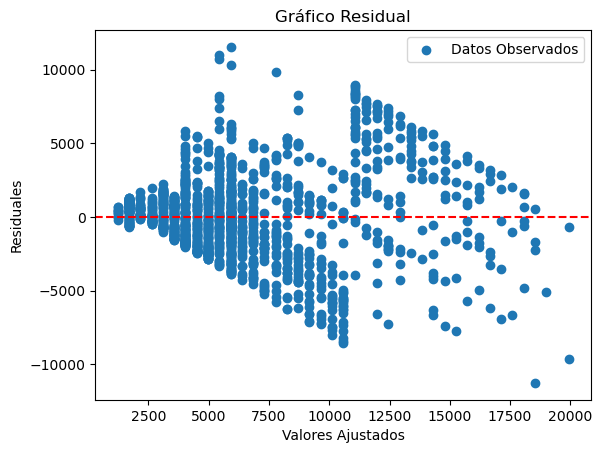

In [124]:
# Cálculo residual
residuals = model.resid

# Visualizamos el cálculo residual
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfico Residual')
plt.legend(['Datos Observados', 'Línea Predicción'])
# Añadmos la línea horizontal en y=0
plt.axhline(y=0, color='red', linestyle='--')  
plt.show()

<p>El gráfico de scatter-plot nos muestra <i>los valores residuales</i> <u>contra</u> <i>los valores predecibles</i>.</p>

In [125]:
# Modelo Original
print(model.summary())

# Modelo de Transformación Logarítmica
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          2.73e-292
Time:                        00:16:11   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1227.9353    137.29

<p>Hay más que estudiar sobre los modelos, en el momento, se encuentra más allá de mi conocimiento, pero <u><i><b>estoy interesado en saber más sobre ellos</b></i></u>.</p>

##### 4.7.b Predicción de las renuncias - Modelo de supervivencia con el método Kaplan-Meier
<p>Después de averiguar <i>la tasa de renuncias de nuestra empresa</i>, investigaré la posibilidad de desarrollar un modelo de aprendizaje automático que anticipe las dimisiones.<p>
<p>Para este análisis usaré los valores de las columnas <i>'Attrition', 'YearsAtCompany' y 'AgeRange'</i>.</p>

In [126]:
# Creamos la base de datos para nuestro análisis
df_km_attrition = df_padb[['YearsAtCompany', 'Attrition', 'AgeRange']].copy()
df_km_attrition.head()

YearsAtCompany Attrition  AgeRange
0               6       Yes  38 to 47
1              10        No  48 to 57
2               0       Yes  28 to 37
3               8        No  28 to 37
4               2        No  18 to 27

<p>Para trabajar con nuestro modelo, codificaré los valores de las columnas <i>'Attrition'</i> y <i>'AgeRange'</i>.</p>

In [127]:
# Columna Attrition
# Creamos el código para la columna de Attrition
attrition_ref = {
    "Yes": 1,
    "No": 0
}
# Modificamos los valores de la columna Attrition con el código
df_km_attrition['Attrition'] = df_km_attrition['Attrition'].map(attrition_ref)

# Columna AgeRange
# Codificamos los valores de la columna AgeRange
encoded_age_range = pd.get_dummies(df_km_attrition['AgeRange'], prefix='AgeRange')

# Concatenamos los datos y los agregamos a nuestra base
df_km_attencoded = pd.concat([df_km_attrition, encoded_age_range], axis=1)
df_km_attencoded.drop('AgeRange', axis='columns' , inplace=True)
df_km_attencoded.head()

YearsAtCompany  Attrition  AgeRange_18 to 27  AgeRange_28 to 37  \
0               6          1                  0                  0   
1              10          0                  0                  0   
2               0          1                  0                  1   
3               8          0                  0                  1   
4               2          0                  1                  0   

   AgeRange_38 to 47  AgeRange_48 to 57  AgeRange_more than 58  
0                  1                  0                      0  
1                  0                  1                      0  
2                  0                  0                      0  
3                  0                  0                      0  
4                  0                  0                      0

<p>Ahora es el momento de calcular las curvas de supervivencia con el Kaplan-MeierFitter.</p>

<Axes: title={'center': 'Modelo Kaplan-MeierFitter, Probabilidad Renuncias'}, xlabel='timeline'>

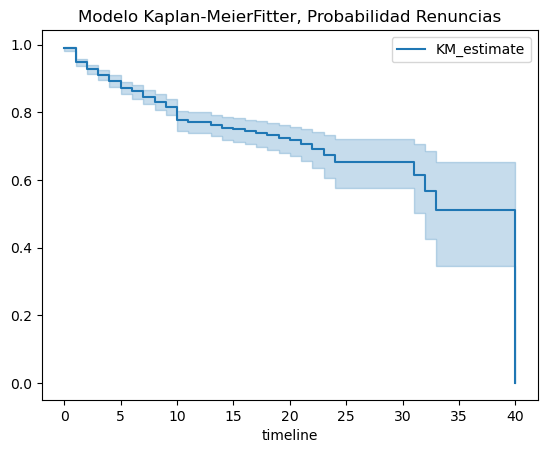

In [128]:
# Importamos el paquete Kaplan-MeierFitter para el análisis
from lifelines import KaplanMeierFitter
from matplotlib.pyplot import title

# Inicializamos el modelo Kaplan-MeierFitter y lo almacenamos dentro de una variable
kmf = KaplanMeierFitter()

# Utilizamos el modelo junto con los datos
kmf.fit(df_km_attencoded['YearsAtCompany'], event_observed = df_km_attencoded['Attrition'])

# Verificamos el estado de la curva
kmf.plot(title="Modelo Kaplan-MeierFitter, Probabilidad Renuncias")

<p>Las primeras impresiones de la investigación nos llevan a creer que <u>el primer período de abandono del trabajo</u> puede ocurrir durante los <i>primeros años</i> de empleo. Necesitamos <u>considerar dónde la trama nos muestra grandes saltos</u>. <i>El segundo período de renuncias</i> es de alrededor de <b>10 años</b> en la empresa. Después de eso, se presenta un período de estabilidad, hasta los <b>25 años</b> es cuando <u>comienza el período de jubilación</u>.</p>
<p>Para tener una idea mejor, vamos a incluir los datos de la columna <i>'AgeRange'</i>.</p>

In [129]:
# Modificamos el nombre de las columnas del rango de edad
df_km_attencoded.rename(columns={"AgeRange_18 to 27": "AR18_27", "AgeRange_28 to 37": "AR28_37", "AgeRange_38 to 47": "AR38_47", "AgeRange_48 to 57": "AR48_57", "AgeRange_more than 58": "AR58"}, inplace=True)
df_km_attencoded.columns

Index(['YearsAtCompany', 'Attrition', 'AR18_27', 'AR28_37', 'AR38_47',
       'AR48_57', 'AR58'],
      dtype='object')

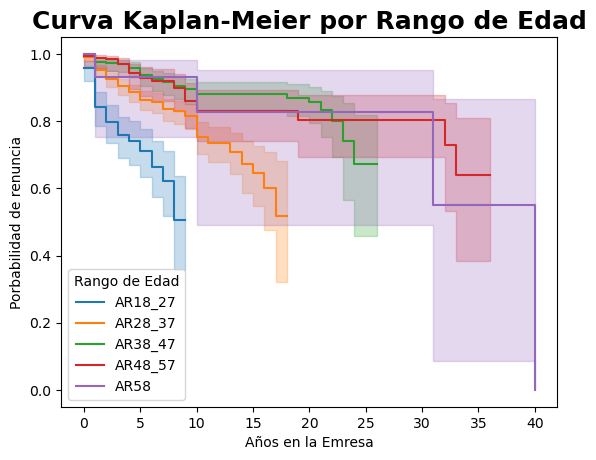

In [130]:
# Graficamos las curvas para cada rango de edad
for age_range in ['AR18_27', 'AR28_37', 'AR38_47', 'AR48_57', 'AR58']:
    # Filtramos los datos por rango de edad
    years_at_work = df_km_attencoded.loc[df_km_attencoded[age_range] == 1, 'YearsAtCompany']
    attrition = df_km_attencoded.loc[df_km_attencoded[age_range] == 1, 'Attrition']
    
    # Utilizamos el modelo Kaplan-Meier para cada rango de edad
    kmf.fit(years_at_work, event_observed=attrition, label=age_range)
    
    # Graficamos los datos
    kmf.plot()

# Añadimos título y etiquetas
plt.xlabel('Años en la Emresa')
plt.ylabel('Porbabilidad de renuncia')
plt.legend(title='Rango de Edad')
plt.title('Curva Kaplan-Meier por Rango de Edad', fontsize=18, fontweight='bold')

plt.show()

<p>Con la adición de los valores <i>'AgeRange'</i>, ahora tenemos 5 líneas. Cada uno de ellos muestra información diferente. Para el rango de <b>18 a 27</b>, podemos apreciar que la <u>probabilidad de renunciar la empresa</u> es en el <i>primer año en la compañía</i>, y luego en unos nueve años más tarde. En el rango de <b>28 a 37</b>, <u>la probabilidad de renunciar la empresa</u> es también en el <i>primer año, luego diez años más tarde, y el último punto sucede cuando tienen 16 o 17 años</i> trabajando en la empresa. Los rangos <b>38 a 47</b> y <b >48 a 57</b > <u>muestran más estabilidad en la empresa</u>. Para el último rango, <b>más de 58</b>, tenemos <u>tres pausas importantes</u>: <i>el primer año, luego a los diez años, y el último a los 31 años</i>.</p>

##### 4.8 Conclusión y Observaciones

<p>Después de realizar un análisis exploratorio de la base de datos <i>'WA_Fn-UseC_-HR-Employee-Attrition'</i>, pude determinar que la organización posee un <u>”buen balance”</u> entre los <i>niveles de estudio, el género y la edad de los empleados</i>. A partir de este punto, la organización puede decidir las políticas de diversidad que considere necesarias.</p>
<p>En cuanto a los <i>niveles de satisfacción</i>, están en <b>niveles aceptables</b>, pero se recomienda <u>prestar atención al porcentaje de disconformes</u>, y tomar medidas para reducir el porcentaje y evitar problemas a futuro, especialmente en puestos que están <i> muy involucrados con el trabajo</i>.</p>
<p><i>Los planes de carrera</i> pueden necesitar ajustes, particularmente porque, como se puede ver en las renuncias, <u>la empresa está perdiendo empleados en rangos de edad bajos</u>. No se pudo medir es el ingreso de empleados nuevos para tener un mejor panorama de la entrada y salida de los empleados.</p>
<p><i>Los sueldos muestran estar acordes a los rangos del nivel educativo que poseen los empleados</i>.</p>
<p>Las horas dedicadas a la <i>Capacitación</i> <u>son equitativas para todos los departamentos</u> y están dentro de los rangos normales. Tener presente que los diferentes departamentos tienen diferentes números de empleados y que todos tienen el mismo promedio de horas dedicadas a capacitarse.</p>
<p>La empresa tuvo un buen <i>balance trabajo-familia</i> para sus empleados, y no hubo anomalías significativas en el balance trabajo-familia. Se recomienda seguir con lo que se está haciendo.</p>
<p>En cuanto a <i><b>las renuncias</b></i>, se descubrió que la mayoría de ellas podrían estar relacionadas con los <u>salarios por debajo del promedio</u>. Además, <i>las personas de <b>18 a 47</b> mostraron la mayor mobilidad</i>. Si al análisis le agregamos el nivel educativo, se puede decir que la empresa <u><i>perdió talento</i></u>. Sin embargo no se pudo comprobar si la empresa realizó ingresos para compensarlos.</p>
<p>Después del análisis descriptivo, el siguiente paso será recrear el tiempo para hacer una comparación de las métricas.</p>